


# Problem Statement
## Business Understanding

You work for a consumer finance company that specializes in lending various types of loans to urban customers. When the company receives a loan application, it must make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e., he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## Objective

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Constraints

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
  - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate).
  - **Current**: Applicant is in the process of paying the installments, i.e., the tenure of the loan is not yet completed. These candidates are not labeled as 'defaulted'.
  - **Charged-off**: Applicant has not paid the installments in due time for a long period of time, i.e., he/she has defaulted on the loan.

- **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements, etc.). Since the loan was rejected, there is no transactional history of those applicants with the company, and so this data is not available with the company (and thus in this dataset).
is it correct markdown for my lending club case study as a first step or i can add additional things in it

In [2]:
## Load the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import warnings 
## Ignore Warnings..20
warnings.filterwarnings('ignore') 

C:\Users\Adesh Pathak\AppData\Local\Temp\ipykernel_22088\4098923424.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
## Load data set
loan_df = pd.read_csv('loan.csv')

## Data Understanding

In [4]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [5]:
## Check if sub header or sub footer are present
loan_df.head()
#loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**From above We conclude that here is no subheader or footer in the given data set**

## 1. Data Cleaning

In [6]:
## types of loan Status
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

**While the 'Current' status is useful but it doesn't provide a final outcome, so our  analysis will mainly focus on comparing 'Fully Paid' and 'Charged-off' loans. This can help in distinguishing between loans that are successful and those that default.**

In [7]:
## Get that applicant whose loans are Fully Paid or Charged Off
loan_df1 = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
loan_df1.shape

(38577, 111)

**We have removed 1140 rows which has loan_status 'current'**

In [8]:
## Check Duplicated Rows
loan_df1.duplicated().sum()

0

**So we don't have duplicate rows**

### Remove unneccessary Data

In [8]:
## check null values in each column
loan_df1.isnull().mean() * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

**We can clearly see that there are columns which has 100% of null values,So we will remove those columns because theese columns does not give any meaningful information**

In [9]:
## removing those columns which are completely null
loan_df2 = loan_df1.dropna(axis=1,how='all')
loan_df2.shape

(38577, 56)

**We have removed 55 columns which are completely null**

In [10]:
## check null values again for each column
loan_df2.isnull().mean().sort_values() * 100

id                             0.000000
earliest_cr_line               0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
total_acc                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
delinq_2yrs                    0.000000
total_pymnt_inv                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000
application_type               0.000000
acc_now_delinq                 0.000000
delinq_amnt                    0.000000
total_rec_prncp                0.000000
dti                            0.000000
inq_last_6mths                 0.000000
zip_code                       0.000000


**As we can see that for mths_since_last_record,mths_since_last_delinq has more than 60% has null values so we can drop theese columns beside this desc(Loan description) has also more than 30% null values so we will remove this column also because it has text value ant it will not contribute in any meaningful information**

In [10]:
## remove columns mths_since_last_delinq,mths_since_last_record,desc
loan_df2.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'desc'], inplace=True)
loan_df2.shape

(38577, 53)

In [10]:
## check null values again
loan_df2.isnull().sum().sort_values(ascending=False)

emp_title                     2386
emp_length                    1033
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

**still we have null values in some columns, so we will check them one by one**

In [11]:
## collections_12_mths_ex_med unique values
loan_df2['collections_12_mths_ex_med'].unique()
##As we can see that from collections_12_mths_ex_med unique values it has only 0 or null so we will remove it
loan_df2.drop(labels='collections_12_mths_ex_med',axis=1,inplace=True)

In [12]:
## chargeoff_within_12_mths unique values
loan_df2['chargeoff_within_12_mths'].unique()
##As we can see that from chargeoff_within_12_mths unique values it has only 0 or null so we will remove it
loan_df2.drop(labels='chargeoff_within_12_mths',axis=1,inplace=True)

In [13]:
## tax_liens unique values
loan_df2['tax_liens'].unique()
##As we can see that from tax_liens unique values it has only 0 or null so we will remove it
loan_df2.drop(labels='tax_liens',axis=1,inplace=True)

In [14]:
## pub_rec_bankruptcies unique values
loan_df2['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [18]:
## last_pymnt_d unique values
loan_df2['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Apr-16', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [74]:
## emp_title unique values
loan_df2['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [75]:
## revol_util unique values
loan_df2['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [76]:
## title unique values
loan_df2['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [77]:
## last_credit_pull_d values
loan_df2['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [14]:
## check null values again
loan_df2.isnull().sum().sort_values(ascending=False)

emp_title                  2386
emp_length                 1033
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
total_rec_prncp               0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_late_fee            0
total_rec_int                 0
open_acc                      0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
policy_code                   0
application_type              0
acc_now_delinq                0
delinq_amnt                   0
pub_rec                       0
id                            0
inq_last_6mths                0
annual_inc                    0
loan_amnt                     0
funded_amnt                   0
funded_a

**As we can see that still we have null values in some rows,so we will remove that rows which have null values,without making any assumption**

In [15]:
## Drop those rows which have null values
loan_df2.dropna(how='any',inplace=True) 

In [16]:
round(loan_df2.isnull().mean().sort_values() * 100,2)

id                         0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_d               0.0
last_pymnt_amnt            0.0
last_credit_pull_d         0.0
policy_code                0.0
application_type           0.0
acc_now_delinq             0.0
inq_last_6mths             0.0
earliest_cr_line           0.0
delinq_2yrs                0.0
dti                        0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installm

In [17]:
loan_df2.shape

(35367, 50)

**Now we don't have any missing values**

In [22]:
## check unique values count in each columns
loan_df2.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
out_prncp_inv                  1
out_prncp                      1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             509
zip_code                     805
loan_amnt                    847
funded_amn

**We can see that there are some columns which has single value in each row so the column with a single unique value does not contribute any meaningful information hence we will remove them**

In [18]:
## remove columns which has one unique values
loan_df3= loan_df2.loc[:,loan_df2.nunique()>1]
loan_df3.shape

(35367, 42)

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.Theese columns are


- **id**: is a random number given to the loan, does not contribute to analysis.
- **member_id**: is a random number given to the member, does not contribute to analysved.
- **url**: is a URL for LC page corresponding to each `member_id`, nothing to do with loan default.
- **zip_code**: first 3 digits of the 5-digit zip code are visible; also is redundant with `addr_state`, does not contributeanalysis.rity.
- **funded_amnt_inv**: value for this column is almost equivalent to `funded_amnt`; removing to avoid multicollinearity. Also, this won't be available at the time of decision-making for funding a
- **total_pymnt_inv**: value for this column is almost equivalent to `total_pymnt`; removing to avoid multicollinearity. Also, this won't be available at the time of decision-making for funding a loan. loan.


In [19]:
columns_tobe_dropped = ['id','member_id','funded_amnt_inv','url','zip_code','total_pymnt_inv']
loan_df3= loan_df3.drop(columns_tobe_dropped,axis=1)

## 2. Data Conversion

In [25]:
## check data types for each columns
loan_df3.dtypes

loan_amnt                    int64
funded_amnt                  int64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_rec_prncp            float64
total_rec_int       

In [20]:
loan_df3.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,5632.210000,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,...,10110.840000,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,...,3939.135294,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [20]:
# loan_amnt should be float
loan_df3 = loan_df3.astype({'loan_amnt':'float','funded_amnt':'float'})

In [21]:
## interest rate should be float
loan_df3['int_rate'] = loan_df3['int_rate'].str.replace("%","").astype('f')

In [22]:
## revolving line utilization rate should be float
loan_df3['revol_util'] = loan_df3['revol_util'].str.replace("%","").astype('f')

In [23]:
## term should be in int(According to data_dictionary)
loan_df3['term'] = loan_df3['term'].apply(lambda x:int(x.replace("months","")))

In [24]:
loan_df3.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500.0,2500.0,60,15.270000,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000.0,10000.0,36,13.490000,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000.0,5000.0,36,7.900000,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,5632.210000,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000.0,7000.0,60,15.960000,170.08,C,C5,Southern Star Photography,8 years,RENT,...,10110.840000,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000.0,3000.0,36,18.639999,109.43,E,E1,MKC Accounting,9 years,RENT,...,3939.135294,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [25]:
## check and convert issue date to y-m-d format
loan_df3['issue_d'] = pd.to_datetime(loan_df3['issue_d'],format="%b-%y")
loan_df3['issue_d_month'] = loan_df3['issue_d'].dt.month
loan_df3['issue_d_year'] = loan_df3['issue_d'].dt.year

In [26]:
## check and convert last payment date to y-m-d format
loan_df3['last_pymnt_d'] = pd.to_datetime(loan_df3['last_pymnt_d'],format="%b-%y")
loan_df3['last_pymnt_d_month'] = loan_df3['last_pymnt_d'].dt.month
loan_df3['last_pymnt_d_year'] = loan_df3['last_pymnt_d'].dt.year

In [34]:
loan_df3['last_pymnt_d']

1       2013-04-01
3       2015-01-01
5       2015-01-01
6       2016-05-01
7       2015-01-01
           ...    
39551   2010-02-01
39562   2008-08-01
39623   2008-05-01
39666   2009-10-01
39680   2010-08-01
Name: last_pymnt_d, Length: 35367, dtype: datetime64[ns]

In [27]:
## check and convert last_credit_pull_d to y-m-d format
loan_df3['last_credit_pull_d'] = pd.to_datetime(loan_df3['last_credit_pull_d'],format="%b-%y")
loan_df3['last_credit_pull_d_month'] = loan_df3['last_credit_pull_d'].dt.month
loan_df3['last_credit_pull_d_year'] = loan_df3['last_credit_pull_d'].dt.year
loan_df3['last_credit_pull_d']

1       2013-09-01
3       2016-04-01
5       2016-01-01
6       2016-05-01
7       2014-12-01
           ...    
39551   2014-05-01
39562   2008-08-01
39623   2016-05-01
39666   2010-03-01
39680   2010-07-01
Name: last_credit_pull_d, Length: 35367, dtype: datetime64[ns]

In [28]:
## check and convert earliest_cr_line to y-m-d format
loan_df3['earliest_cr_line'] = pd.to_datetime(loan_df3['earliest_cr_line'],format="%b-%y")
loan_df3['earliest_cr_line_month'] = loan_df3['earliest_cr_line'].dt.month
loan_df3['earliest_cr_line_year'] = loan_df3['earliest_cr_line'].dt.year
loan_df3['earliest_cr_line']

1       1999-04-01
3       1996-02-01
5       2004-11-01
6       2005-07-01
7       2007-01-01
           ...    
39551   2000-12-01
39562   2000-03-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 35367, dtype: datetime64[ns]

In [37]:
## check employment length
loan_df3['emp_length'].unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

**According to data_dictionary Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years***

In [29]:
# Function to convert emp_length to integer
def convert_emp_length(emp_length):
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])
loan_df3['emp_length'] =  loan_df3['emp_length'].apply(convert_emp_length)
## check unique values again
loan_df3['emp_length'].unique()

array([ 0, 10,  3,  8,  9,  5,  4,  1,  6,  2,  7], dtype=int64)

In [39]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35367 entries, 1 to 39680
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 35367 non-null  float64       
 1   funded_amnt               35367 non-null  float64       
 2   term                      35367 non-null  int64         
 3   int_rate                  35367 non-null  float32       
 4   installment               35367 non-null  float64       
 5   grade                     35367 non-null  object        
 6   sub_grade                 35367 non-null  object        
 7   emp_title                 35367 non-null  object        
 8   emp_length                35367 non-null  int64         
 9   home_ownership            35367 non-null  object        
 10  annual_inc                35367 non-null  float64       
 11  verification_status       35367 non-null  object        
 12  issue_d                

## 3. Univariate and Segmented Univariate Analysis

- ### Univariate And Segment Univariate Analysis

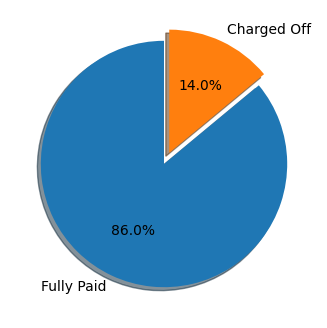

In [30]:
## loan_status analysis
category_counts = loan_df3['loan_status'].value_counts()
pt.figure(figsize=(8,4))
# Create the pie chart
pt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', shadow=True, startangle=90,explode=[0,0.1])
pt.show()

**From above Pie chart we can clearly see that Approximately 14% of loans in the dataset are defaulted**

In [31]:
def frequencyAndBoxplot(df, name, bins, segment_by=None,bucket=False, bucket_labels=None):
    """
    Frequency and box plot with optional bucketing for ordered categorical variables.

    Parameters:
    - df: pandas DataFrame
    - name: variable name to plot
    - bins: number of bins for histogram (ignored if `bucket` is True)
    - segment_by: optional variable to segment the boxplot
    - bucket: whether to bucket the variable into ranges (for ordered categorical variables)
    - bucket_labels: labels for the buckets if `bucket` is True
    """
    
    if segment_by:
        total_plot = 3
    else:
        total_plot = 2

    if bucket and bucket_labels is not None:
        # Bucketing the ordered categorical variable
        df[name + '_Bucket'] = pd.cut(df[name], bins=bins, labels=bucket_labels, include_lowest=True)
        name = name + '_Bucket'
        
    formatted_name = name.replace('_', ' ').title()
    fig, axes = pt.subplots(1, total_plot, figsize=(15, 10))
    
    # Plotting the histogram with a trendline on the first subplot
    sns.histplot(df[name], kde=True, bins=bins, edgecolor='black', ax=axes[0])
    axes[0].set_xlabel(name)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f"{formatted_name} Distribution with Trendline")
    axes[0].tick_params(axis='x', rotation=90)
    
    # Plotting the boxplot on the second subplot
    sns.boxplot(y=df[name], ax=axes[1])
    axes[1].set_ylabel(name)
    axes[1].set_title(f'{formatted_name} Boxplot')
    
    if total_plot == 3:
        sns.boxplot(x=df[segment_by], y=df[name], ax=axes[2])
        axes[2].set_xlabel(segment_by)
        axes[2].set_ylabel(name)
        axes[2].set_title(f'{formatted_name} Boxplot Segmented by {segment_by}')
    # Adjust layout
    pt.tight_layout(pad=2)
    pt.subplots_adjust(hspace=0.3, wspace=0.3)
    pt.xticks(rotation=45)
    # Show the plot
    pt.show()


In [32]:
def univariateBarGraph(df, categorical_variables, group_by=None, agg_func='count', percent_based_on=None):
    """
    Univariate and segmented univariate categorical variable bar plot with optional grouping and aggregation.

    Parameters:
    - df: pandas DataFrame
    - categorical_variables: list of variables to plot bar plot
    - group_by: variable to group by (default is None)
    - agg_func: aggregation function to apply (default is 'count')
    - percent_based_on: column to base percentage annotations on (default is None)

    Returns:
    - None
    """
    co = 3
    ro, extra_columns = divmod(len(categorical_variables), co)

    # If there are extra columns, add an additional row to accommodate them
    if extra_columns > 0:
        ro += 1

    fig, ax = pt.subplots(ro, co, figsize=(40, 5 * ro))

    # Flatten the ax array if it's 2D
    if ro * co > 1:
        ax = ax.flatten()
    else:
        ax = [ax]  # Ensure ax is a list for consistent indexing
    for i, var in enumerate(categorical_variables):
        row, col = divmod(i, co)
        
        # Apply grouping and aggregation
        if group_by:
            data = df.groupby(group_by)[var].agg(agg_func)
            
            # Calculate percentage if percent_based_on is specified
            if percent_based_on:
                total = df.groupby(group_by)[percent_based_on].sum()
                percentages = (data / total) * 100  
                data = percentages  # Plot percentages
                
            data.plot(kind='bar', stacked=True, ax=ax[i], title=var)
                
        else:
            data = df[var].value_counts()
            percentages = (data / data.sum()) * 100
            data = percentages  # Plot percentages
            data.plot(kind='bar', ax=ax[i], title=var)
            
        # Annotate bars with percentage values
        for p,value in zip(ax[i].patches,data):
            ax[i].annotate(f'{value:.1f}%',
                           xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                           xytext=(0, 10),  # Offset text by 10 points
                           textcoords="offset points",
                           ha='center', va='bottom', color='red')
        if percent_based_on:
            # Set y-axis labels to percentage
            ax[i].set_ylabel("Percentage of " f'{var} / {percent_based_on}')
            ax[i].set_yticklabels([f'{int(x)}%' for x in ax[i].get_yticks()])

    # Hide any empty subplots
    for j in range(len(categorical_variables), ro * co):
        fig.delaxes(ax[j])

    pt.tight_layout()
    pt.subplots_adjust(hspace=0.7, wspace=0.2)
    pt.show()


In [32]:
## remove outliers using IQR
def removeOutliers(df, column_name):
    """
    Remove outliers from a DataFrame based on a specific column using the IQR method.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, the name of the column to remove outliers from

    Returns:
    - DataFrame with outliers removed
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df


In [34]:
def plot_distribution_by_category(df, x_column, y_column, bins=None, labels=None):
    """
    Plot the percentage distribution of a variable (y_column) within each category or bin (x_column).
    
    Parameters:
    - df: DataFrame containing the data
    - x_column: Name of the column to use for bins or categories
    - y_column: Name of the column to calculate the distribution for
    - bins: List of bin edges for numerical data (optional)
    - labels: List of bin labels for numerical data (optional)
    """
    # Handle numerical x_column by binning
    if bins is not None and labels is not None:
        df[x_column] = pd.cut(df[x_column], bins=bins, labels=labels, include_lowest=True)
    
    # Count total occurrences for each bin or category
    total_counts = df[x_column].value_counts()
    
    # Create a DataFrame for percentage distribution
    percentage_df = pd.DataFrame()
    
    # Calculate the percentage distribution for each category or bin
    for category in total_counts.index:
        category_df = df[df[x_column] == category]
        y_counts = category_df[y_column].value_counts()
        percentage = (y_counts / total_counts[category]) * 100
        percentage_df = pd.concat([percentage_df, percentage.rename(category)], axis=1)
    
    percentage_df = percentage_df.fillna(0).T

    # Plotting
    ax = percentage_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    pt.xlabel(x_column)
    pt.ylabel('Percentage (%)')
    pt.title(f'Percentage Distribution of {y_column} by {x_column}')
    pt.legend(title=y_column)
    pt.ylim(0, 100)

    # Adding percentage values in the middle of each bar segment
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{height:.1f}%', 
                    (x, y),
                    ha='center', va='center', 
                    xytext=(0, 0), textcoords='offset points')

    pt.show()



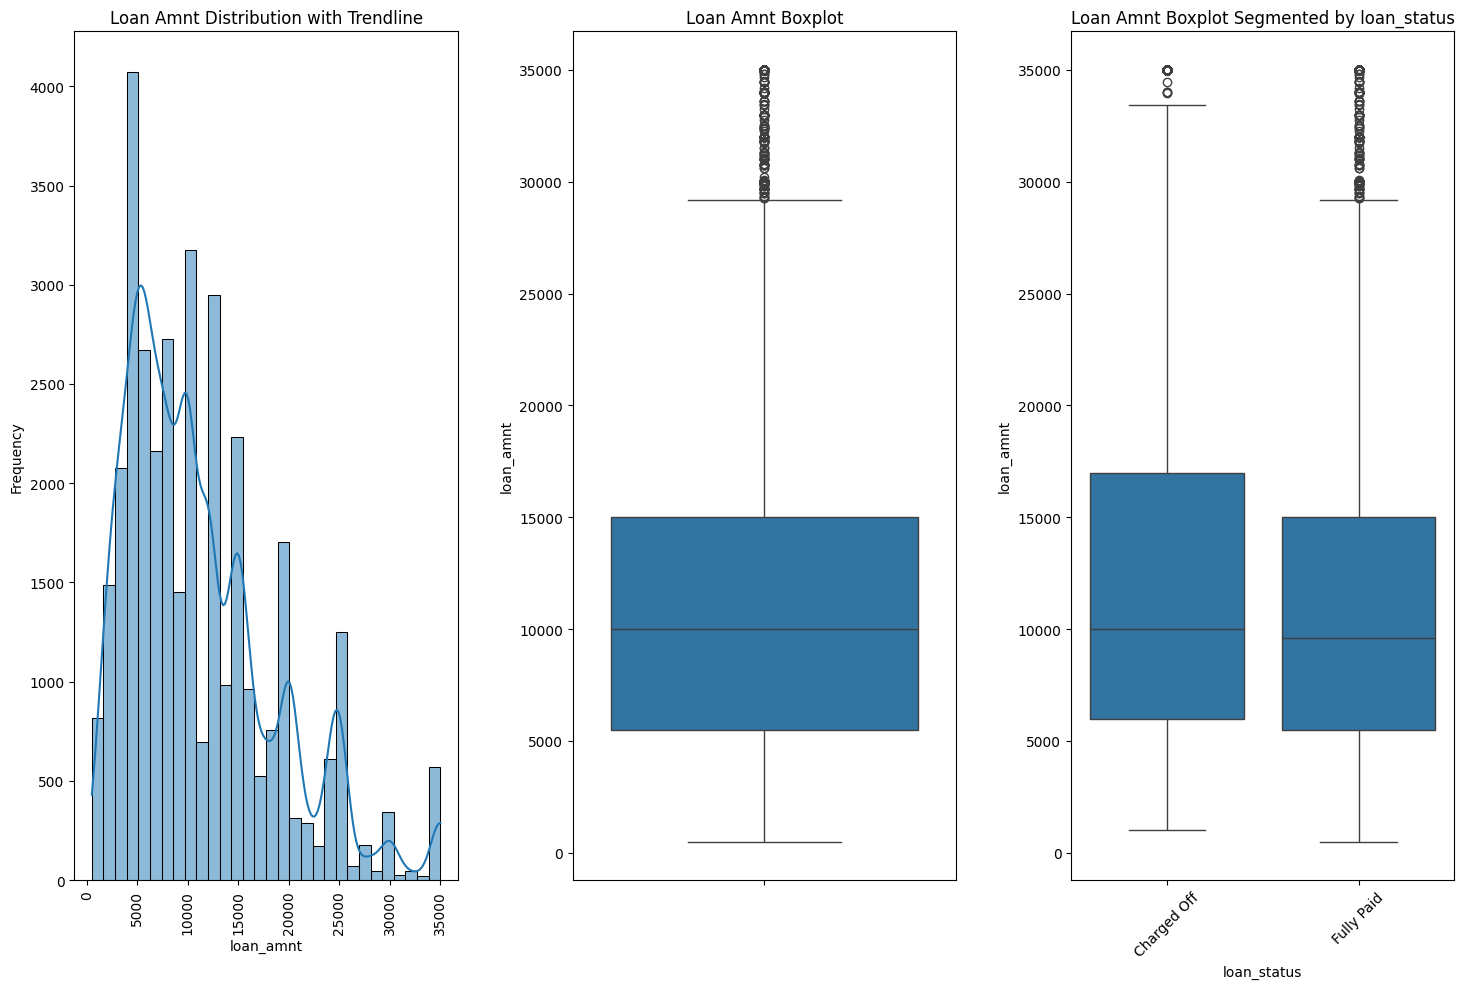

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [35]:
# loan amount Analysis with outliers
frequencyAndBoxplot(loan_df3, 'loan_amnt',bins=30,segment_by='loan_status')
loan_df3.groupby('loan_status')['loan_amnt'].describe()

### Observatios
- Most of the loan amount is below 75% that is below 15000
- There is a large frquency near loan amount 5000
- There are outliers also in the loan amount
- **Fully paid loans has low IQR but more outliers**
- **Charged Off has high average and std in comparison to Fully Paid**

In [33]:
# loan Amount analysis after removing outliers
loan_amnt_filtered = removeOutliers(loan_df3,'loan_amnt')
series = round(loan_amnt_filtered['loan_amnt'])

# Define the bins with a difference of 5000
max_var_loan_amnt = series.max() 
# Create bins for salary buckets with a 5k interval
bins = np.arange(0, int(max_var_loan_amnt) + 5000, 5000)

# Create labels in the format '0-5k', '5-10k', etc.
labels = [f'{i//1000}-{(i+5000)//1000}k' for i in bins[:-1]]
# Loan amount Analysis (frequencyAndBoxplot(df, name, bins, segment_by=None,bucket=False, bucket_labels=None)
frequencyAndBoxplot(loan_amnt_filtered, 'loan_amnt', bins=bins,bucket=True,bucket_labels=labels,segment_by='loan_status')
loan_amnt_filtered.groupby('loan_status')['loan_amnt'].describe()
plot_distribution_by_category(loan_amnt_filtered, 'loan_amnt', 'loan_status', bins=bins, labels=labels)

NameError: name 'frequencyAndBoxplot' is not defined

- **Most of the loan amount are between 5000 to 10000**
- **Fully paid loans has low IQR**
- **Charged Off has high average and std in comparison to Fully Paid**
- **% charged off increasing with increase in loan amount range**

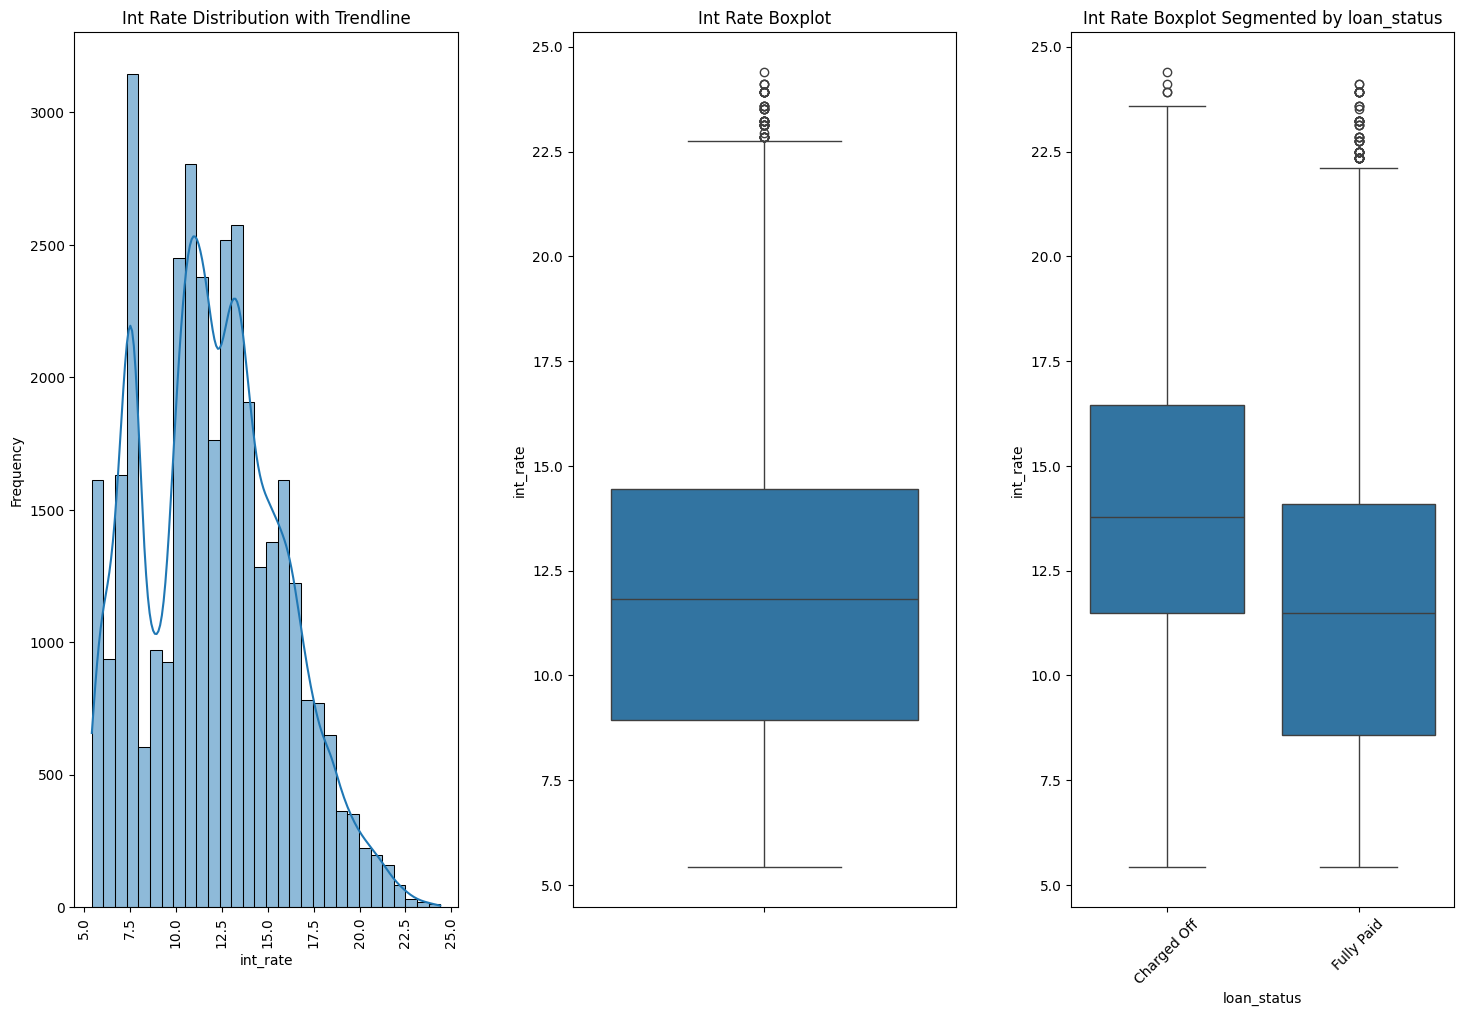

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.450001,24.400000
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.090000,24.110001


In [37]:
# Interest rate analysis
frequencyAndBoxplot(loan_df3, 'int_rate',bins=30,segment_by='loan_status')
loan_df3.groupby('loan_status')['int_rate'].describe()

### Observatios
- overall interest rate vary from **5.42%** to **24.4%**
- There is a dip in frequency probability near about **8.5%** while moving from **5% to 25** and after **10%** it is in decreasing trend.


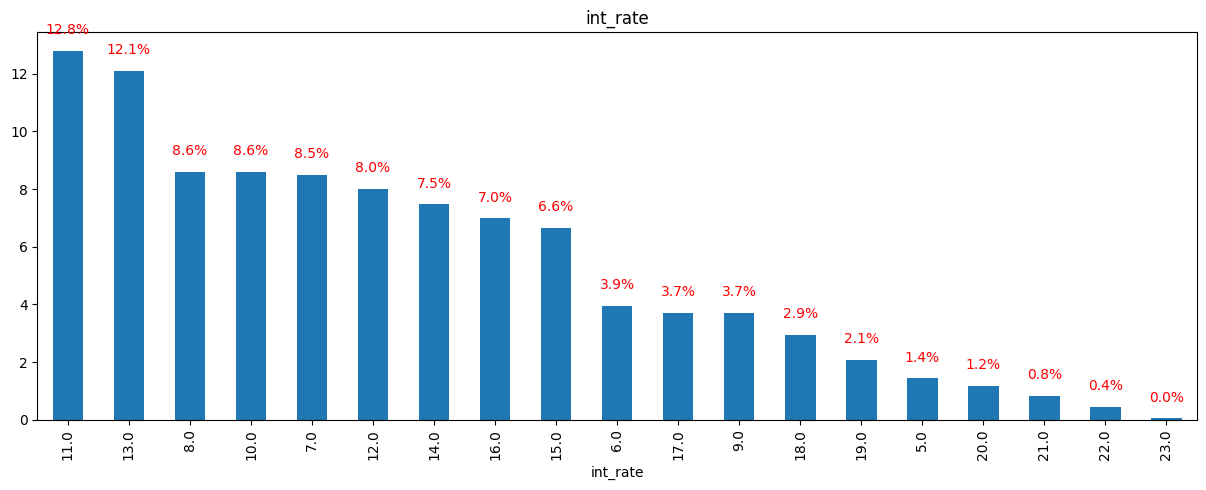

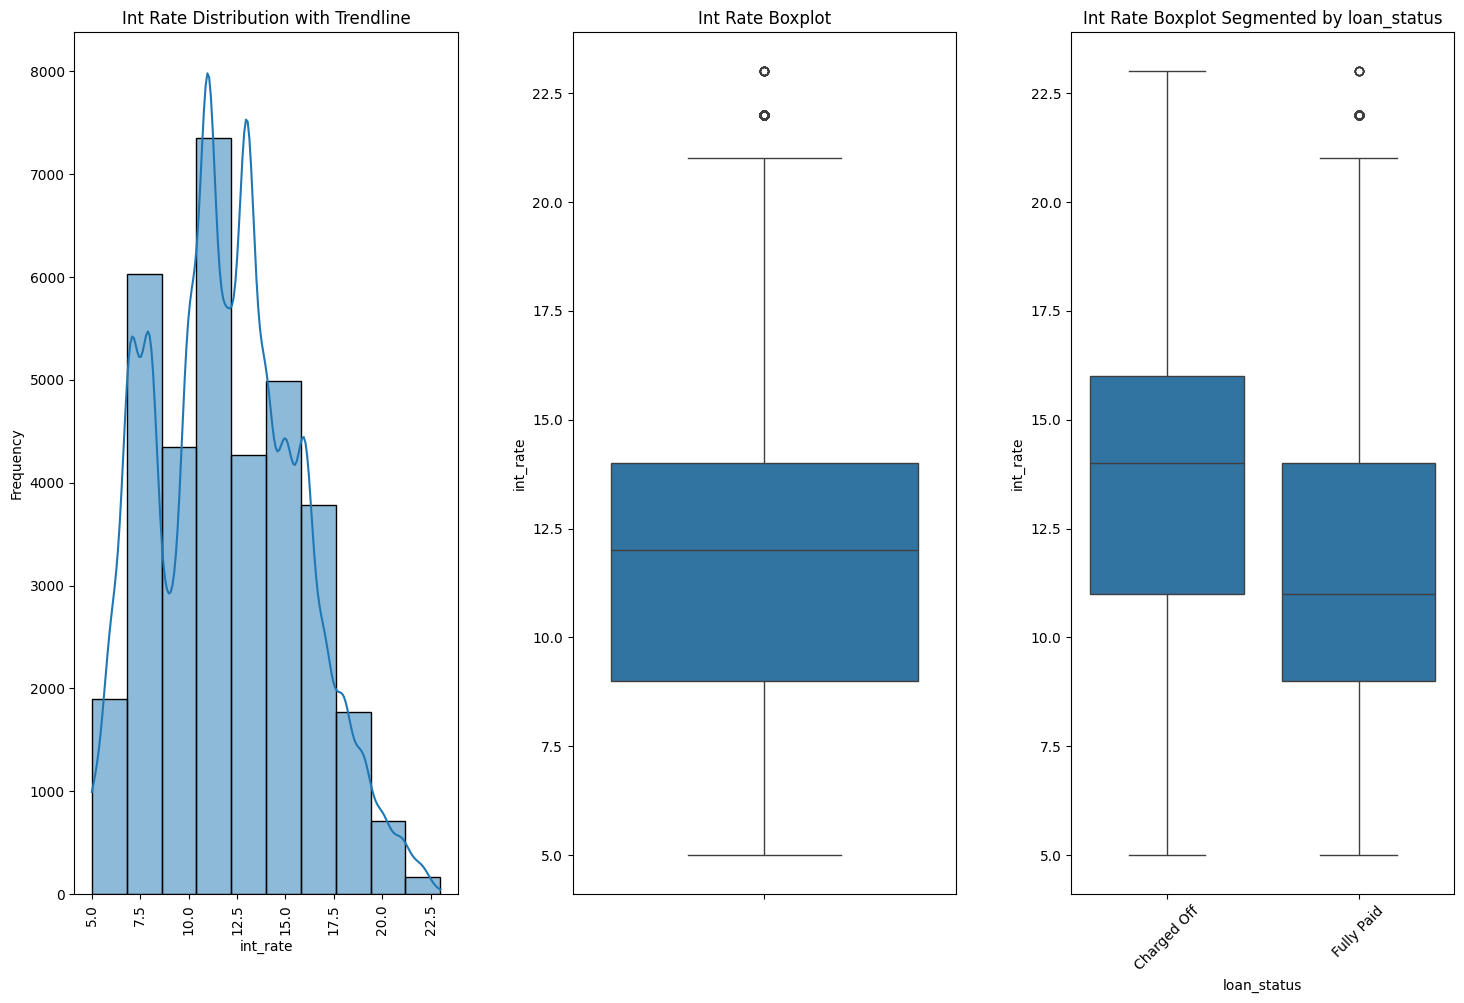

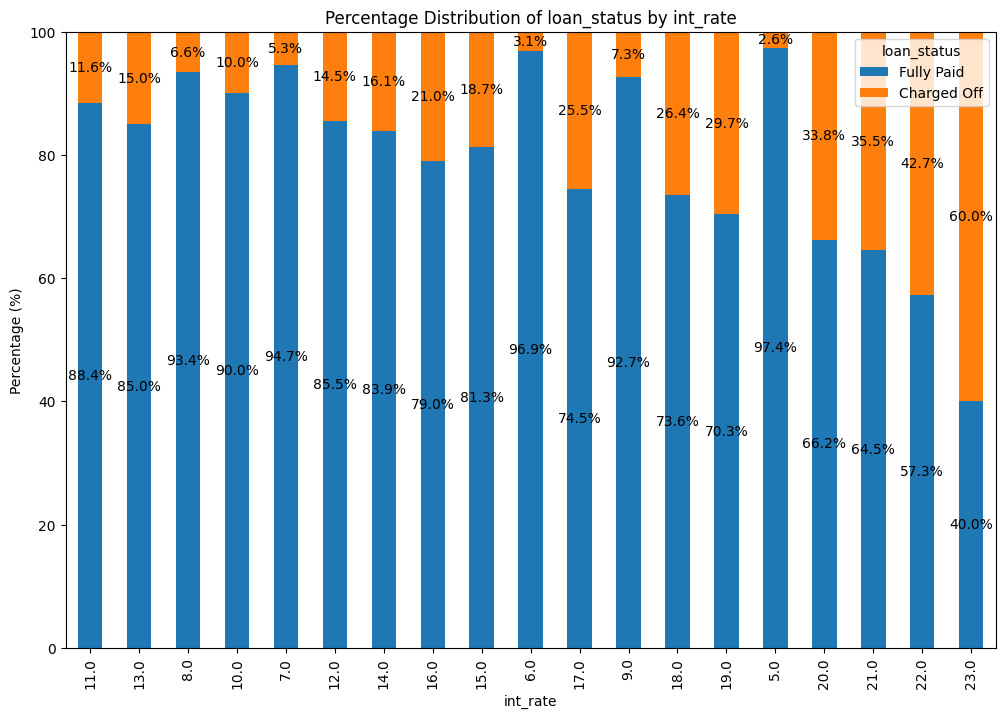

In [48]:
# Interest rate Without outliers
int_rate_filtered = removeOutliers(loan_df3,'int_rate')
int_rate_filtered['int_rate'] = round(int_rate_filtered['int_rate'])
# Interest rate Analysis  
univariateBarGraph(int_rate_filtered, ['int_rate'], group_by=None, agg_func='count')
frequencyAndBoxplot(int_rate_filtered, 'int_rate',bins=10,segment_by='loan_status')
int_rate_filtered.groupby('loan_status')['int_rate'].describe()
plot_distribution_by_category(int_rate_filtered, 'int_rate', 'loan_status')

- **overall interest rate vary from 5% to 23% after removing outliers**
- **11 and 13% intrest rate are more frequent in complete data set**
- **The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases**

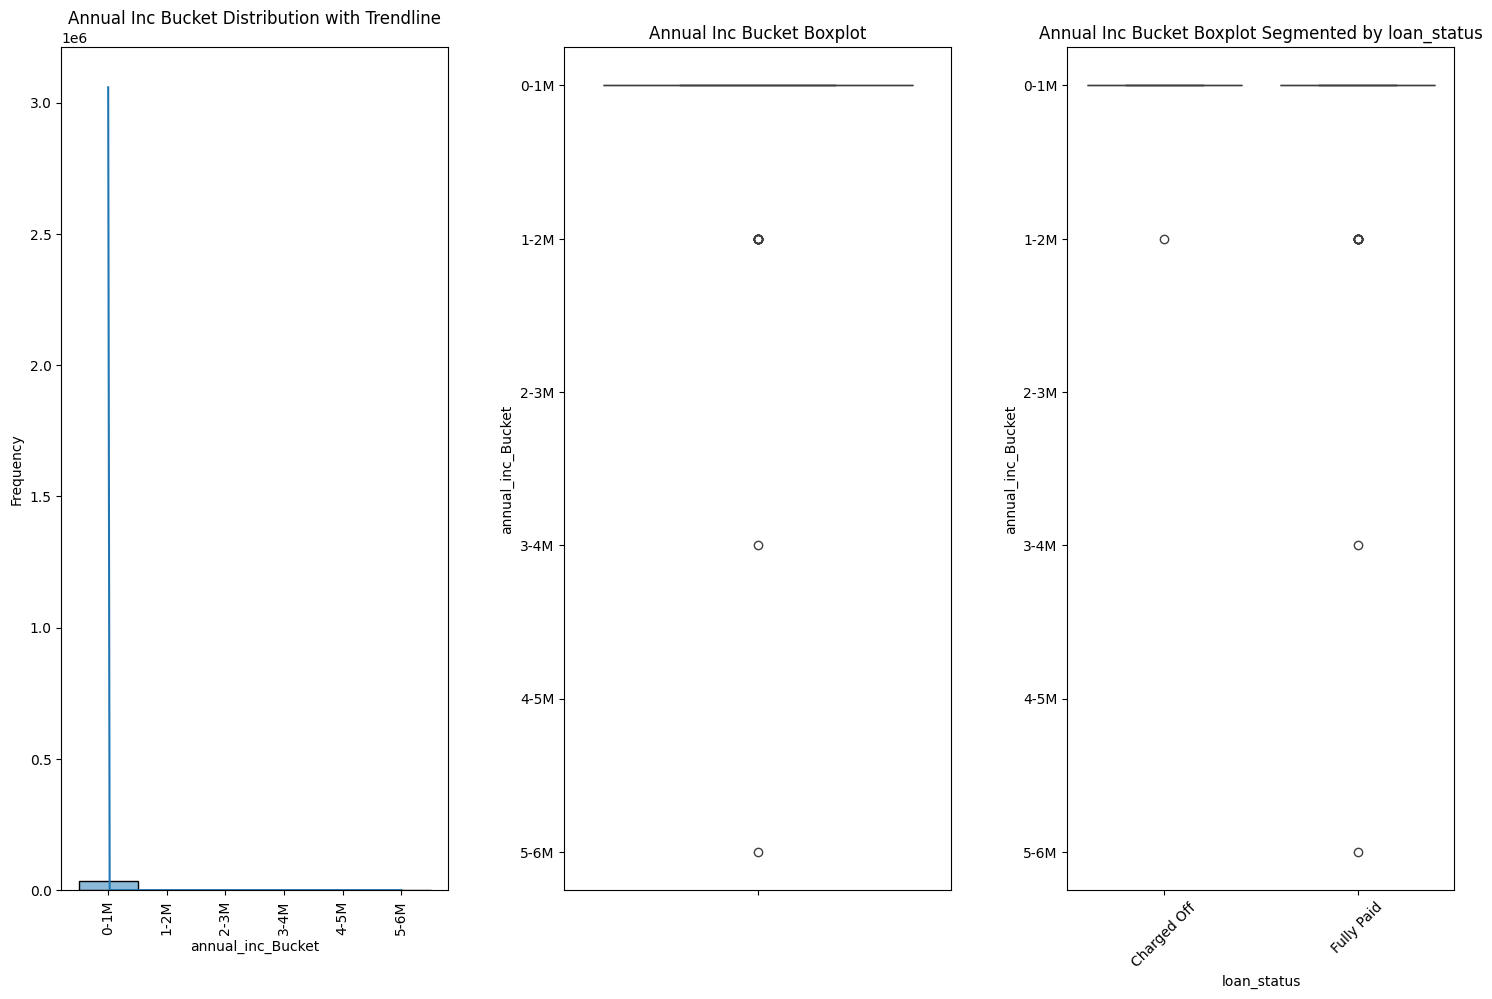

In [38]:
#annual income analysis

series_annual_inc = round(loan_df3['annual_inc'])

# Define the bins with a difference of 5000
max_var_annual_inc = series_annual_inc.max() 
# Create bins for salary buckets with a 1M interval
bins_anual = range(0, int(max_var_annual_inc) + 1000000, 1000000)

# Create labels in the format 
labels_anual = [f'{i//1000000}-{(i+1000000)//1000000}M' for i in bins_anual[:-1]]
# Loan amount Analysis (frequencyAndBoxplot(df, name, bins, segment_by=None,bucket=False, bucket_labels=None)
frequencyAndBoxplot(loan_amnt_filtered, 'annual_inc', bins=bins_anual,bucket=True,bucket_labels=labels_anual,segment_by='loan_status')

**there are lots of outliers in the annual income variable,so we will remove them first**

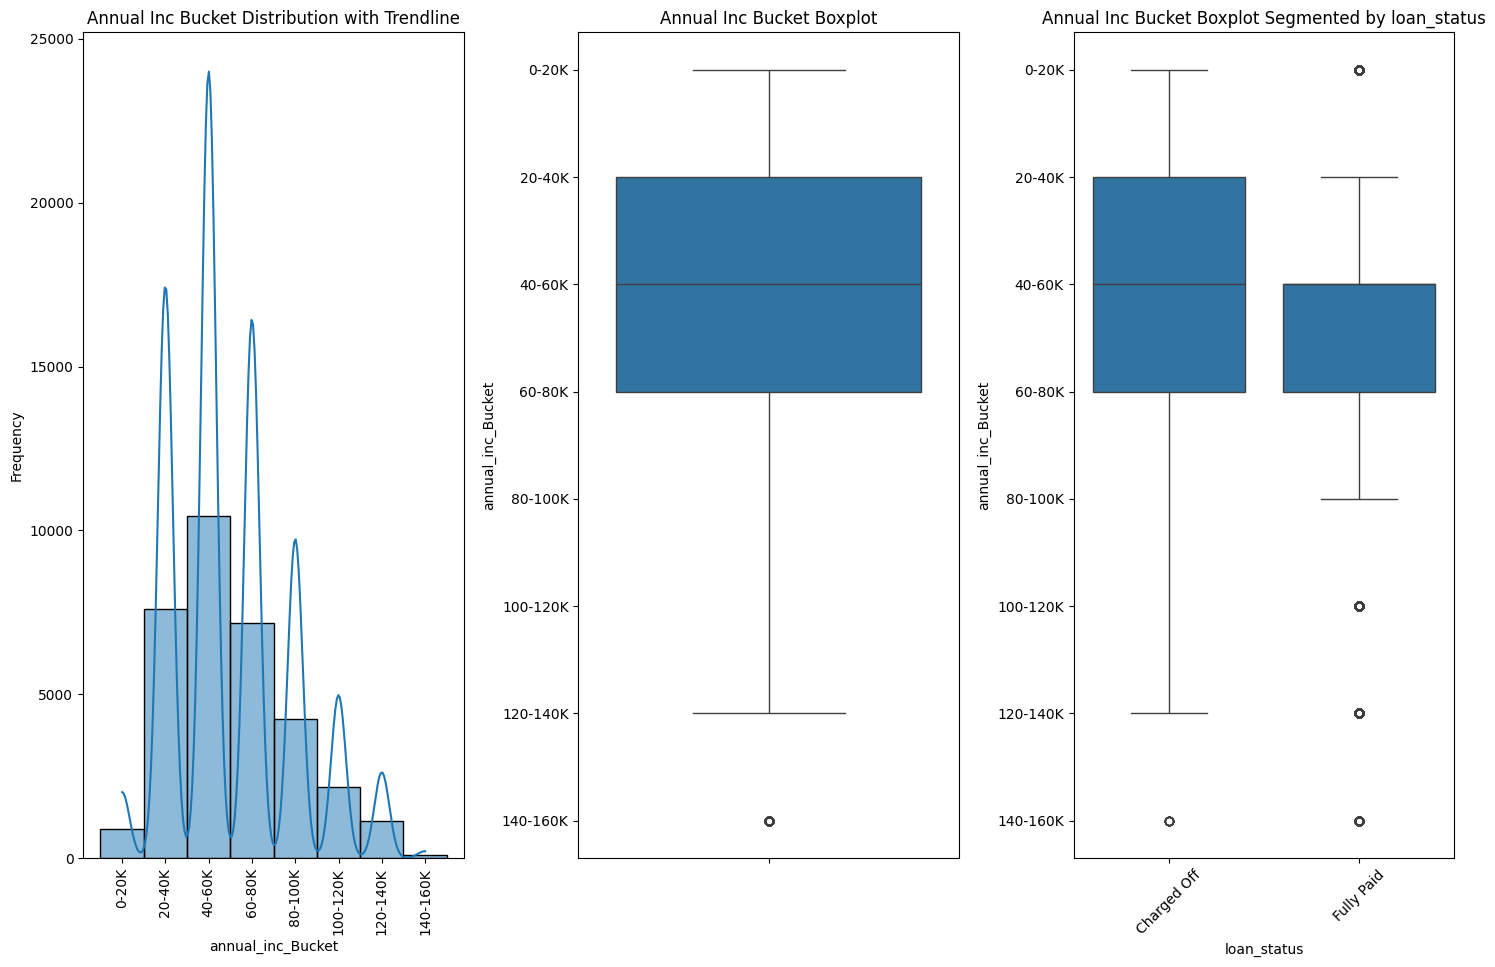

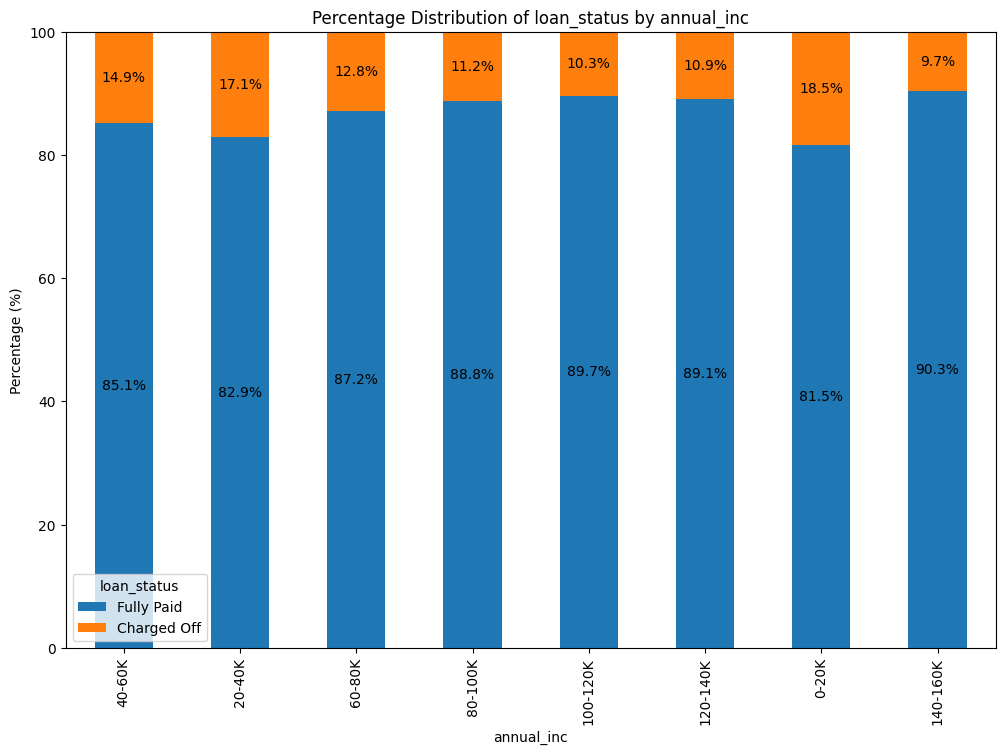

,count,unique,top,freq
loan_status,,,,
Charged Off,4770,8,40-60K,1555
Fully Paid,28977,8,40-60K,8899


In [39]:
# Filter outliers and round the 'annual_inc' column
annual_inc_filtered = removeOutliers(loan_df3, 'annual_inc')
annual_inc_filtered['annual_inc'] = round(annual_inc_filtered['annual_inc'])

# Round the 'annual_inc' series and find the maximum value
series_annual_inc = round(annual_inc_filtered['annual_inc'])
max_var_annual_inc = series_annual_inc.max()

# Create bins for salary buckets with a 20K interval
bins_annual = range(0, int(max_var_annual_inc) + 20000, 20000)

# Create labels in the format '0-20K', '20-40K', etc.
labels_annual = [f'{i//1000}-{(i+20000)//1000}K' for i in bins_annual[:-1]]

# Loan amount Analysis using the frequencyAndBoxplot function|
frequencyAndBoxplot(annual_inc_filtered, 'annual_inc', bins=bins_annual, bucket=True, bucket_labels=labels_annual,segment_by='loan_status')
plot_distribution_by_category(annual_inc_filtered, 'annual_inc','loan_status',bins=bins_annual,labels=labels_annual)
annual_inc_filtered.groupby('loan_status')['annual_inc'].describe()

- **most of the people in the data set fall in income range 30-70k after removing outliers**
- Loan defaults are higher for lower income, and progressively reduce as incomes go up.
- **On lower salery bucket range higher the chance of default(Ex: 0-20k has higher % of charged off in comparison to 20-40k)**

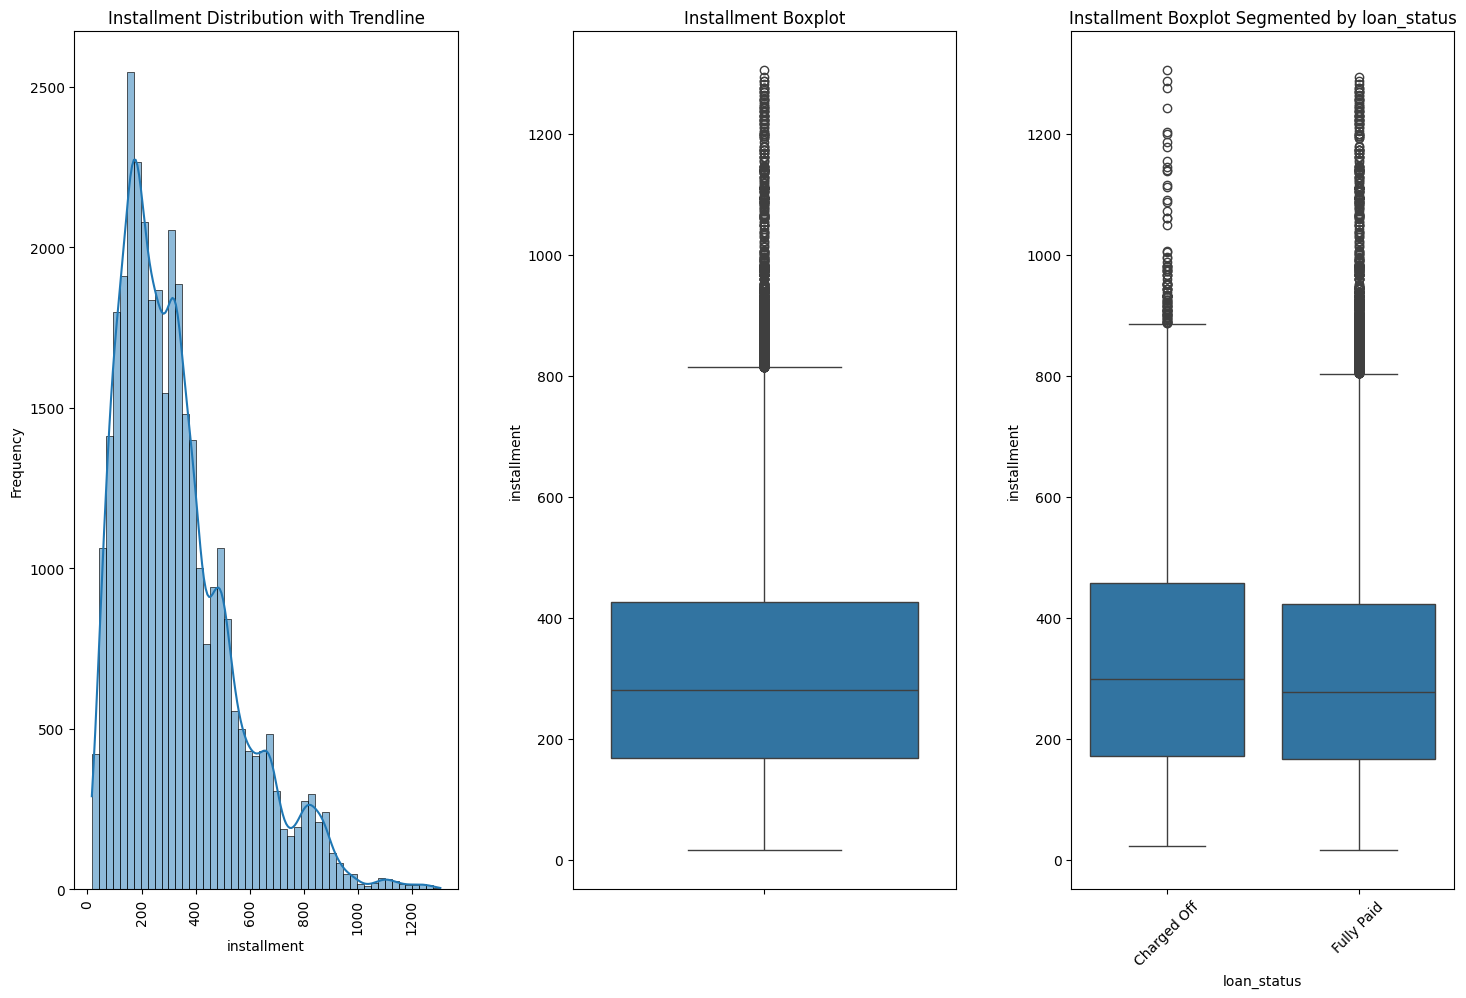

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


In [40]:
# installment  analysis
frequencyAndBoxplot(loan_df3, 'installment',bins=50,segment_by='loan_status')
loan_df3.groupby('loan_status')['installment'].describe()

In [ ]:
# installment Without outliers
installment_filtered = removeOutliers(loan_df3,'installment')

# Installment  Analysis  
frequencyAndBoxplot(installment_filtered, 'installment',bins=50,segment_by='loan_status')
plot_distribution_by_category(installment_filtered, 'installment','loan_status')

In [ ]:
print(loan_df3['installment'].describe())
print("")
print(installment_filtered['installment'].describe())

### Observatios
- overall installment  vary from **16.08** to **1305.19**
- There is a high probability of installment to fall near about  **0 to 400** and after **400** it is in decreasing trend.
- loans Charged Off have high installment on average(we have seen before in interest rate that charged off have high interest rate so the charged off will also have high installment)

**overall installment vary from 16.08 to 814.34 after removing outliers**

In [ ]:
# dti  analysis
frequencyAndBoxplot(loan_df3, 'dti',bins=50,segment_by='loan_status')
loan_df3.groupby('loan_status')['dti'].describe()

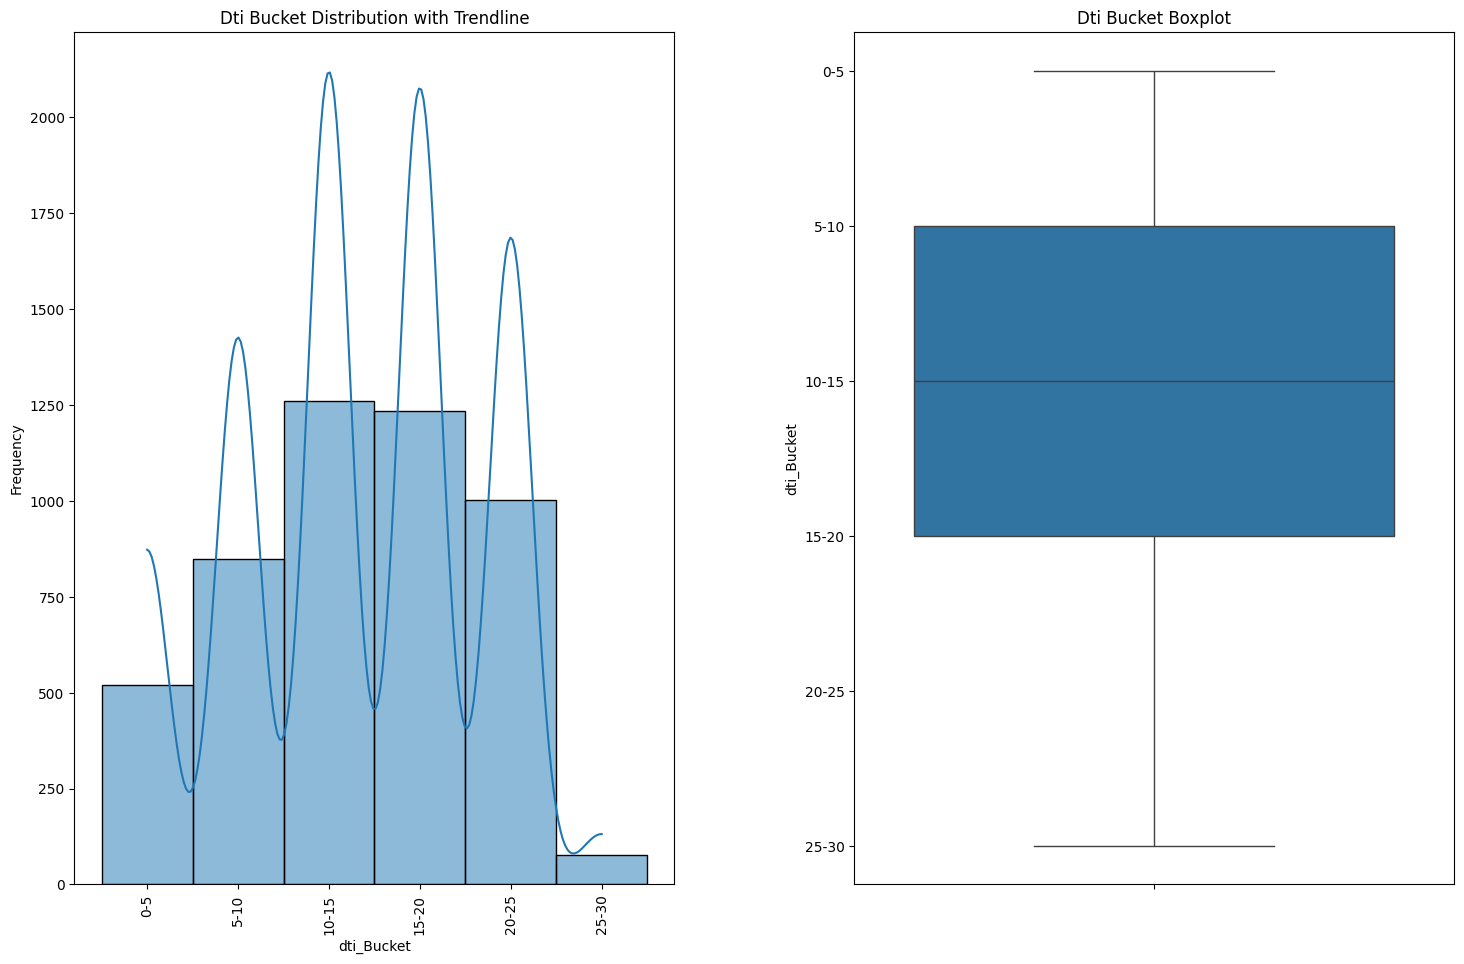

In [56]:
# charged of dti analysis
bins_dti = [0, 5, 10, 15, 20, 25, 30]
labels_dti = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
dti_charged_off = loan_df3[loan_df3['loan_status']=='Charged Off']
frequencyAndBoxplot(dti_charged_off, 'dti', bins=bins_dti, bucket=True, bucket_labels=labels_dti)
# univariateBarGraph(dti_charged_off, ['dti'], group_by=None, agg_func='count')

- The dti index varies from min 0 to max of 30. The median dti is of 13.5
- debt to income to fall between 25 to 30 has very less probability
- When the dti or dept payment to income ratio is higher than 10, higher percentage of loans are Charged Off

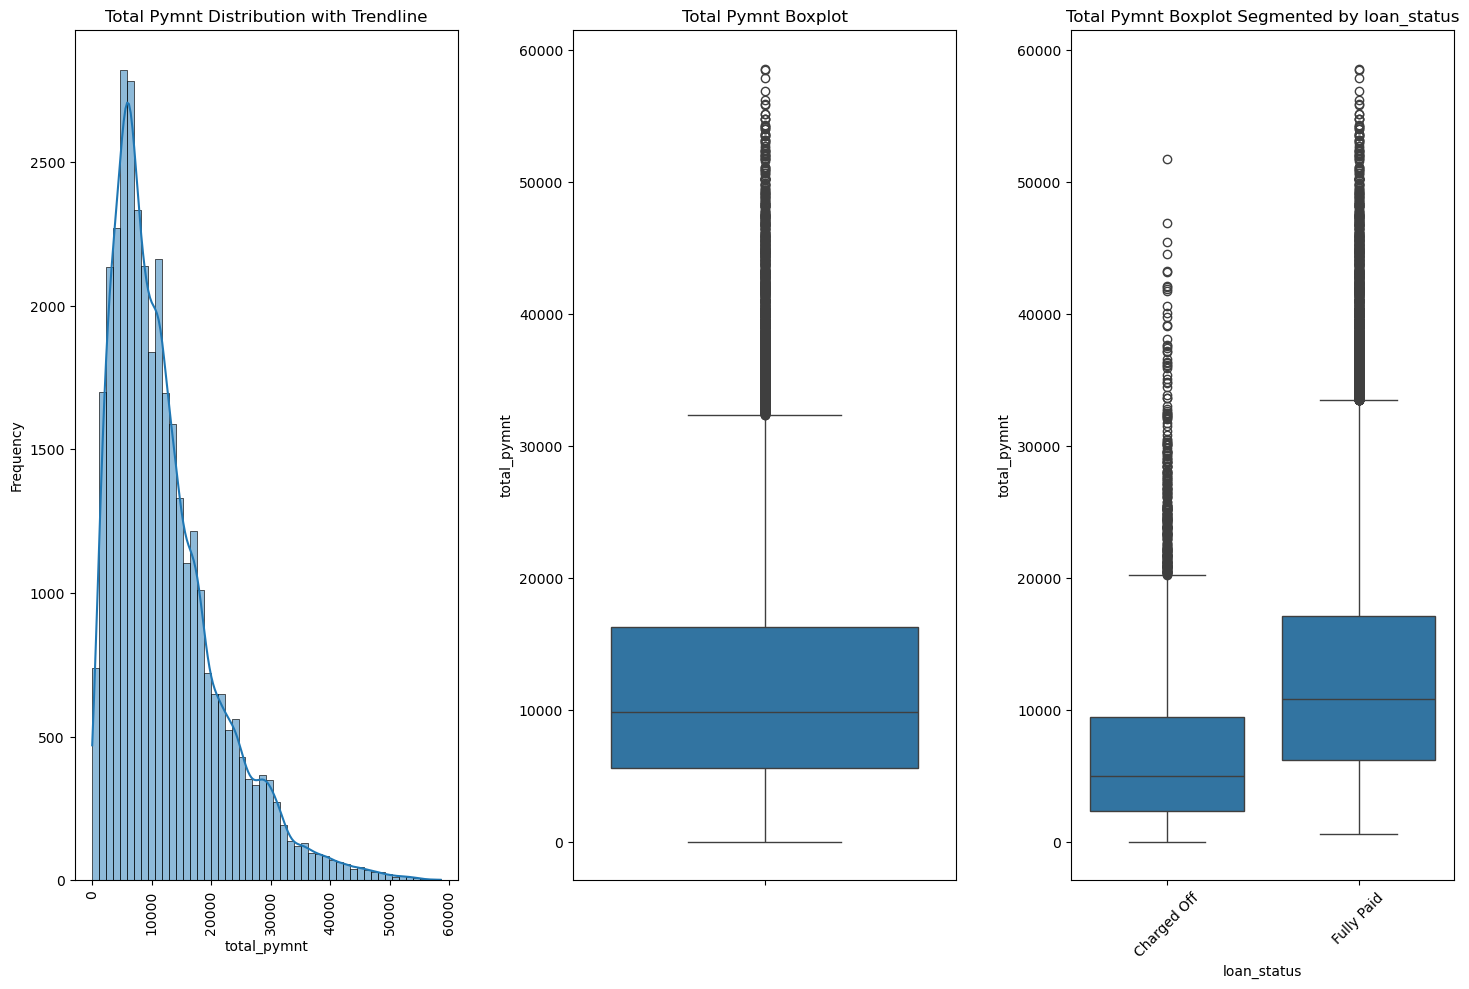

count    35367.000000
mean     12020.407377
std       8817.192502
min         33.730000
25%       5602.511430
50%       9865.711187
75%      16300.486500
max      58563.679930
Name: total_pymnt, dtype: float64

In [123]:
# total_pymnt count analysis
frequencyAndBoxplot(loan_df3, 'total_pymnt',bins=50,segment_by='loan_status')
loan_df3['total_pymnt'].describe()

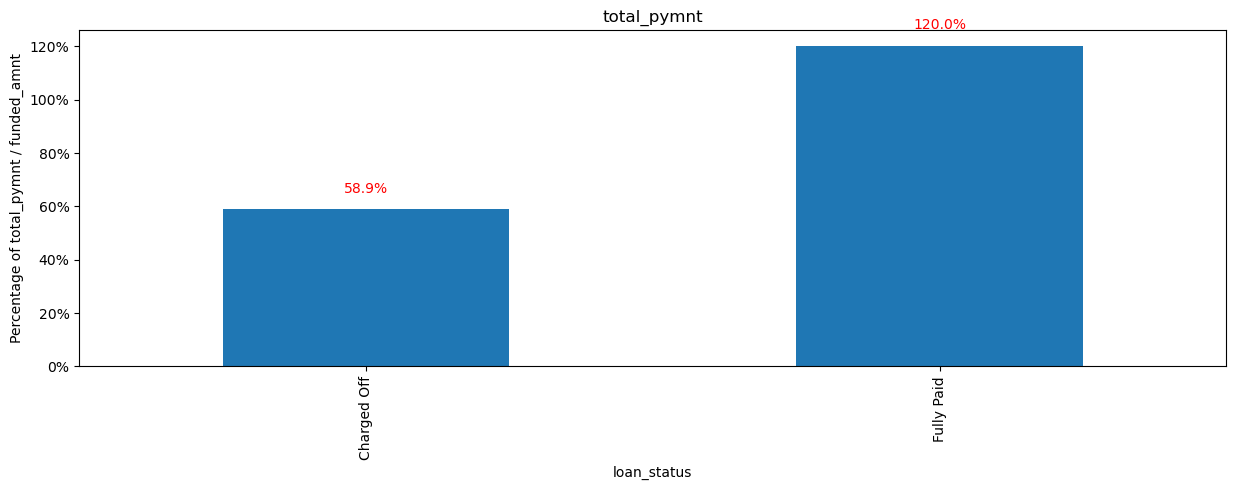

In [141]:
# total payment analysis sum
univariateBarGraph(loan_df3, ['total_pymnt'], group_by='loan_status', agg_func='sum', percent_based_on='funded_amnt')


**Lending Club only recovers approx 59% of the loan amount when loans are defaulted and on fully paid it gets 20% profit**

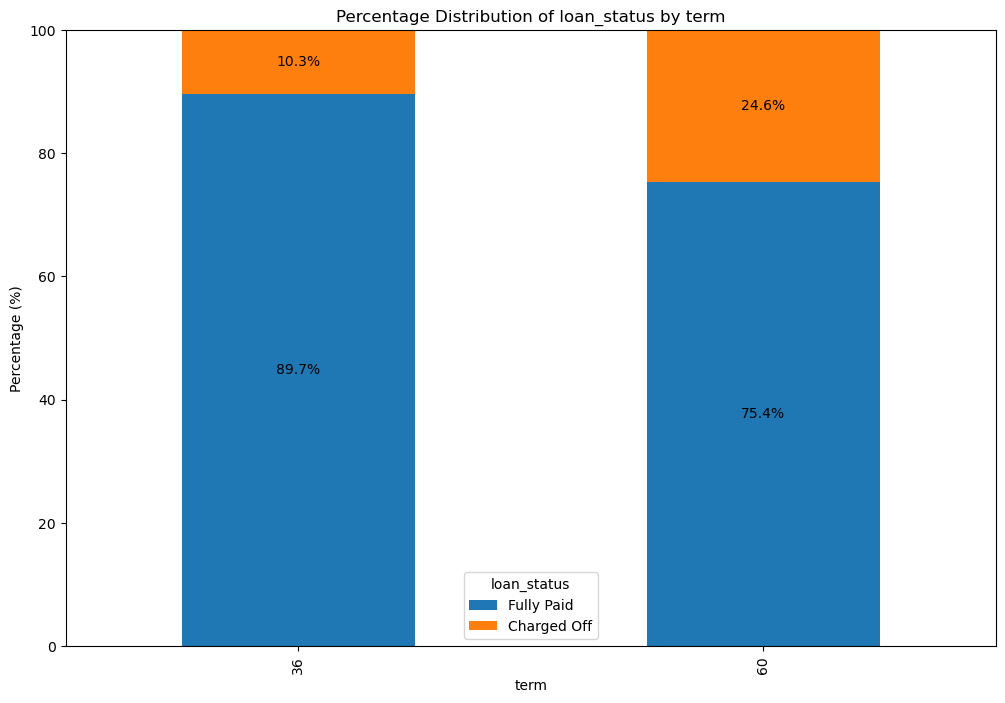

In [142]:
# term distribution
plot_distribution_by_category(loan_df3, 'term', 'loan_status')

**Higher term higher chance of charged off**

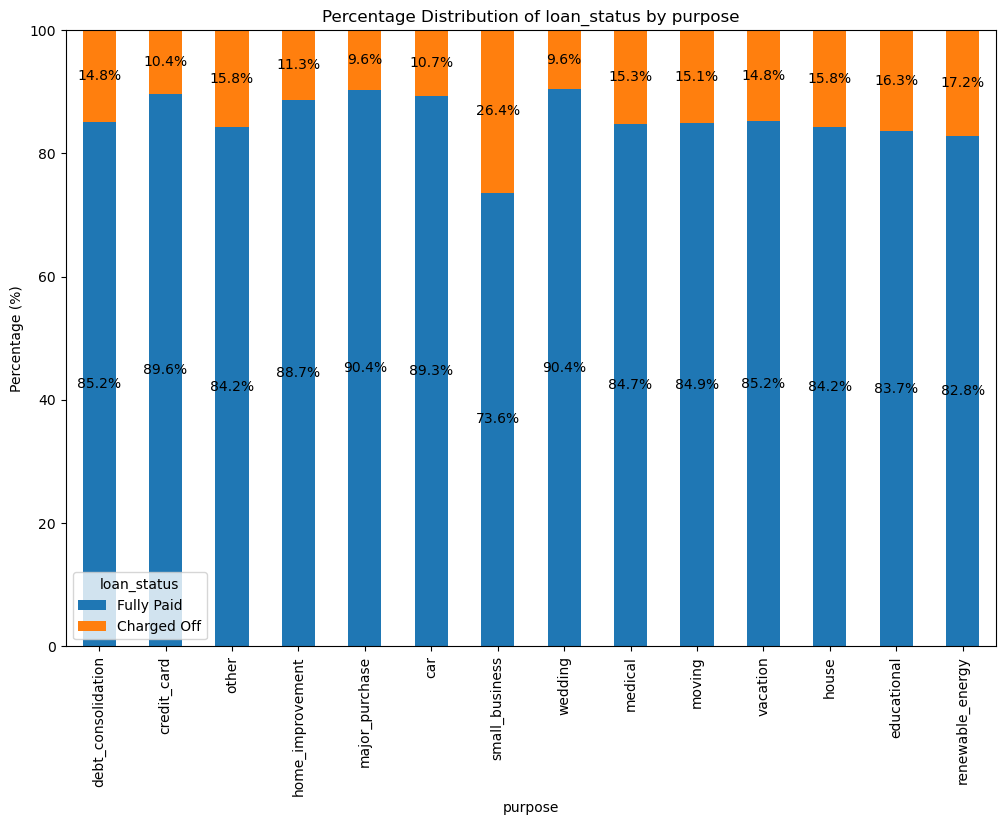

In [126]:
# purpose distribution
plot_distribution_by_category(loan_df3, 'purpose', 'loan_status')

**Small business have higher chance default**

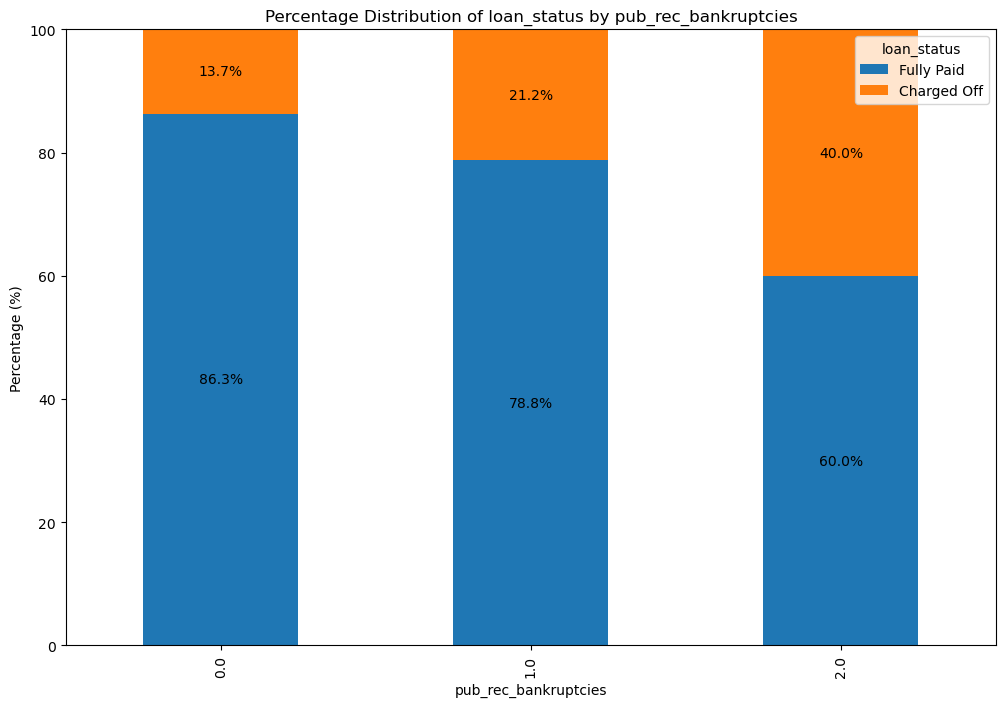

In [127]:
# purpose distribution
plot_distribution_by_category(loan_df3, 'pub_rec_bankruptcies', 'loan_status')

**The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.**

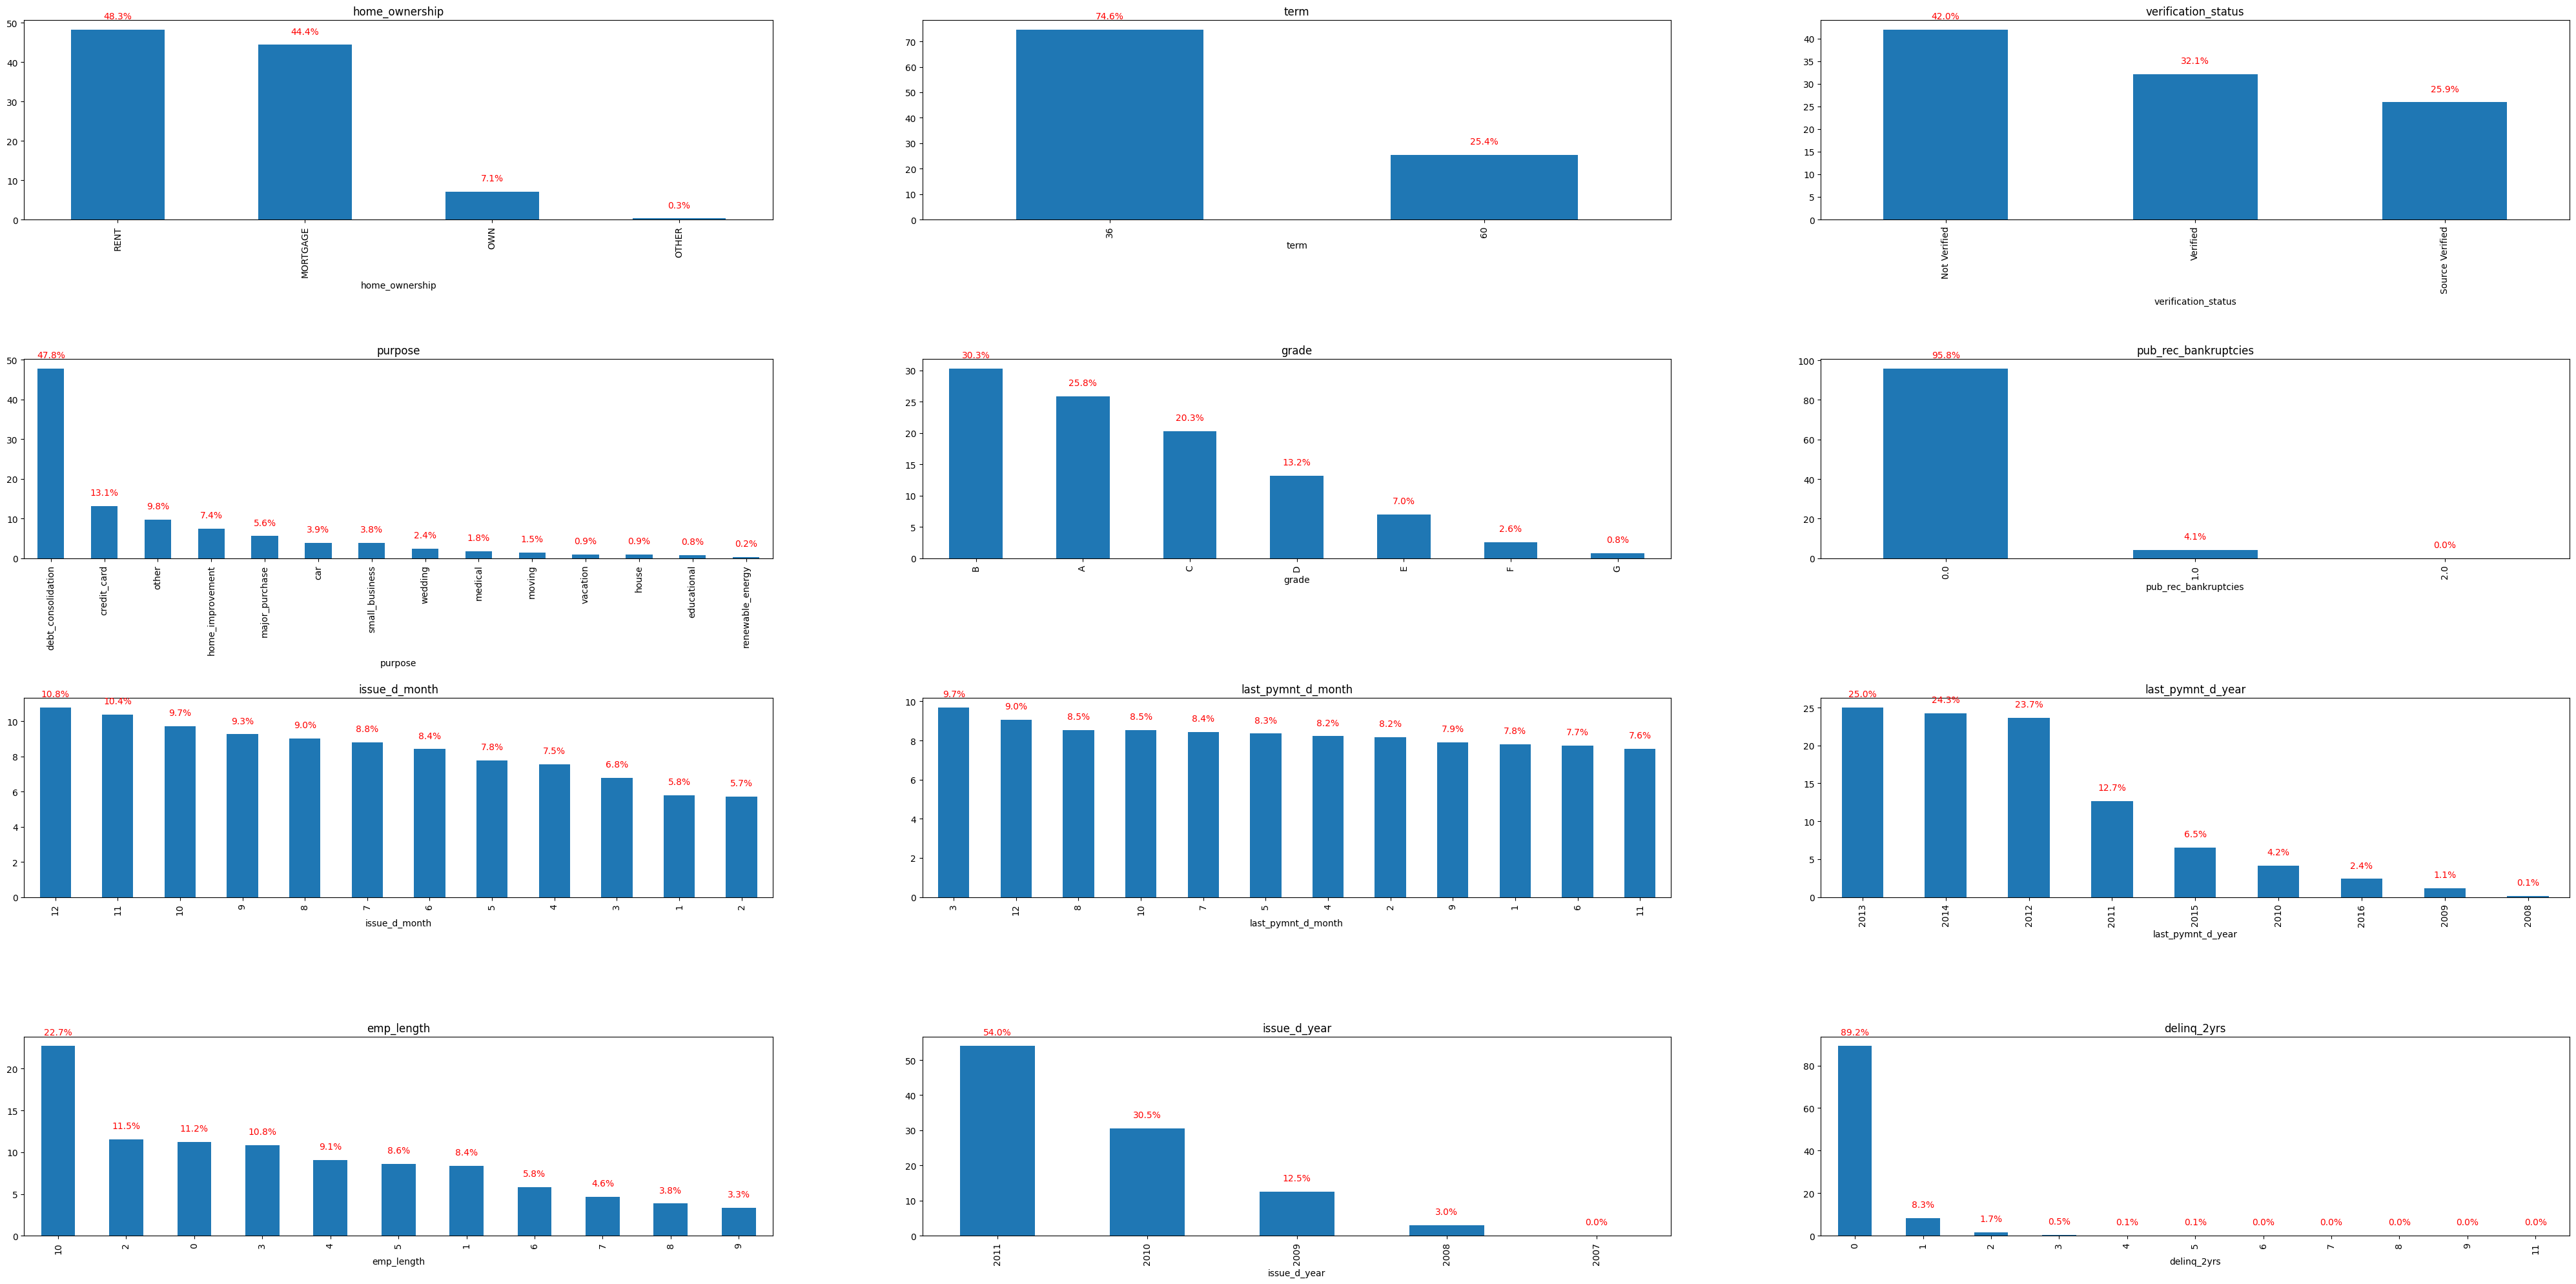

In [57]:
## univariate analysis on categorical variable
categorical_variables1 = [
                         'home_ownership', 'term', 'verification_status',
                         'purpose', 'grade', 'pub_rec_bankruptcies',
                         'issue_d_month','last_pymnt_d_month','last_pymnt_d_year',
                          'emp_length','issue_d_year','delinq_2yrs'
                        ]
## plot bar plot for all categorical variable
univariateBarGraph(loan_df3, categorical_variables1, group_by=None, agg_func='count')


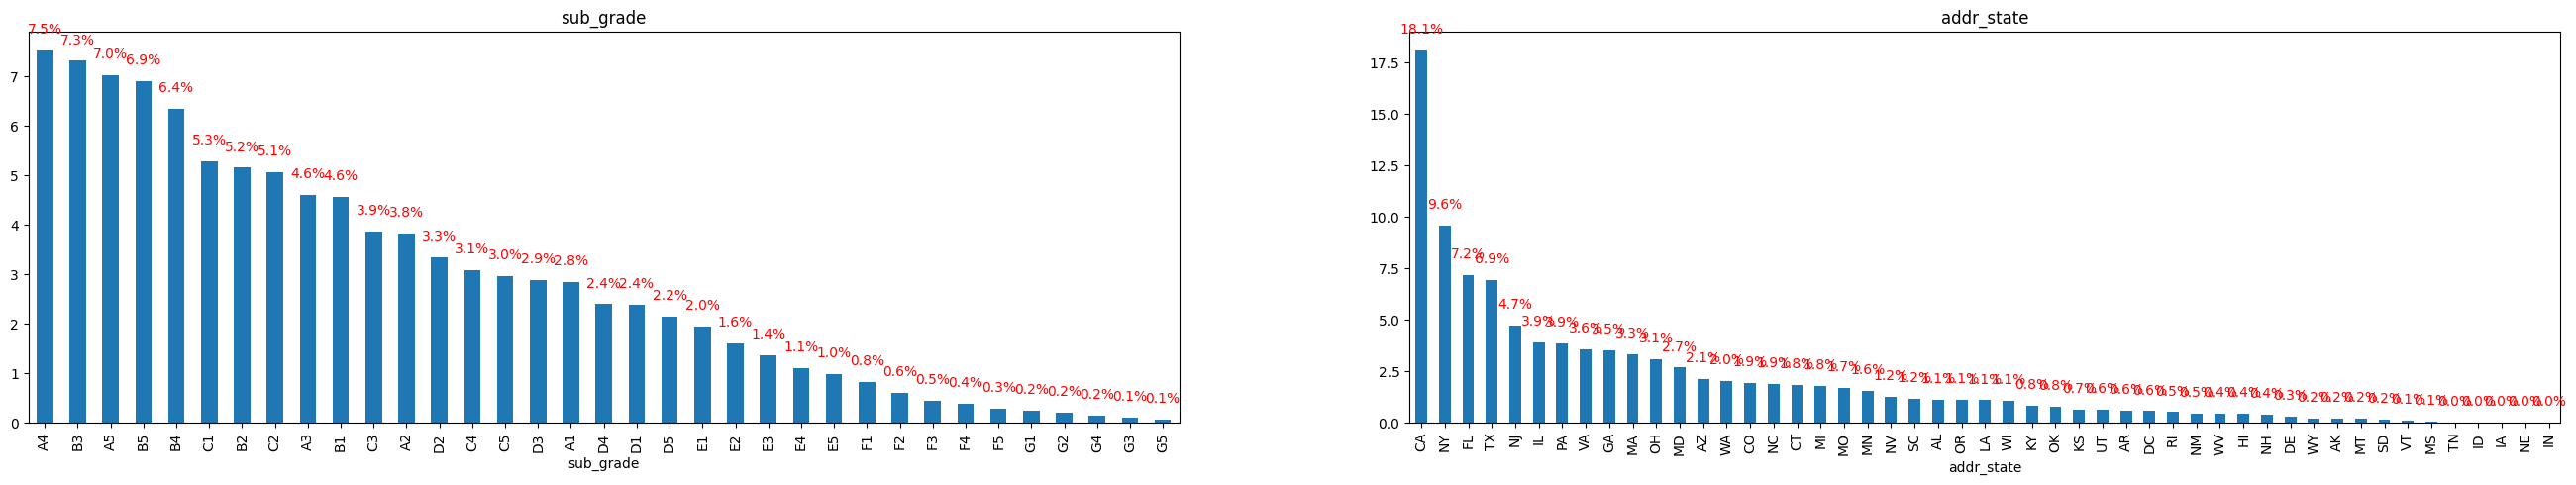

In [58]:
categorical_variables2 = ['sub_grade','addr_state']
## plot bar plot for all categorical variable
univariateBarGraph(loan_df3, categorical_variables2, group_by=None, agg_func='count')


### Observatios
- Most of the Borrower has **home ownership** either **rental** or **mortage**
- Most of the borrower has **loan term** **3 year**
- There is a power law distribution in **varification_status** and most of the borrower are **not verified**
- The loan purpous **debt_consolidation** is quite high among the borrowers
- Borrower Grade count trend **B>A>C>D>E>F>G**
- Most of the borrower has  zero **public bankrepties records**
- 10 years of employment is the most common length, followed by 2 years, 3 years and lesss than 1 year.
- The distribution shows a finer breakdown of the grades, with sub-grades like B4, B5, A5, and B3 being the most common.The frequency decreases as you move to lower sub-grades, particularly in grades like F and G.
- Over the years organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
- Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year where the maximum number of loans are being issued.
- Overall, around 75% of the last payment dates are during 2012-2014 period.
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.

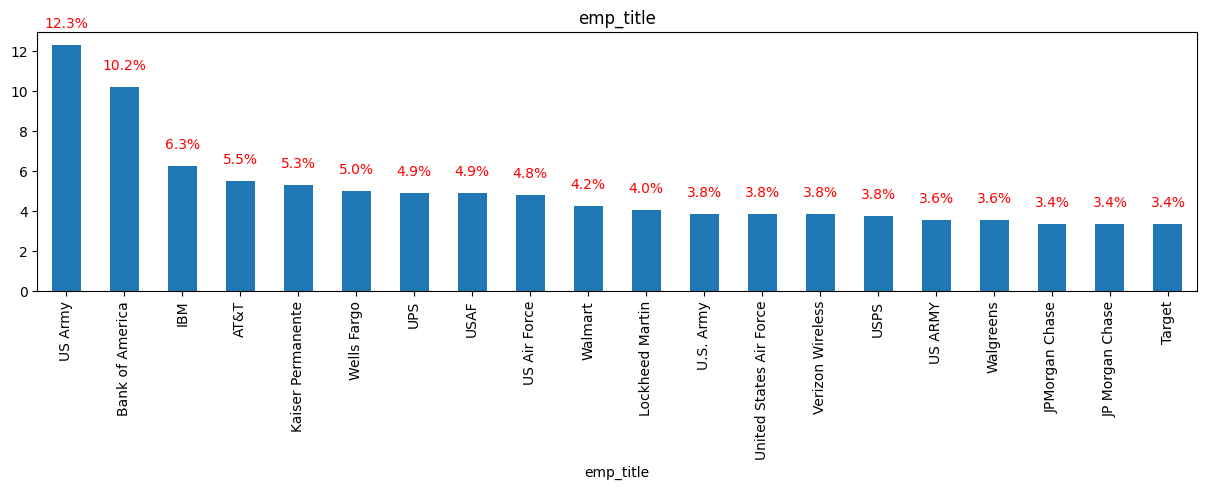

In [59]:
## top 20 employee title analysis
list_of_top_20_emp_title = loan_df3['emp_title'].value_counts().head(20).index.tolist()
list_of_top_20_emp_title_df = loan_df3[loan_df3['emp_title'].isin(list_of_top_20_emp_title)]
## plot bar plot for all categorical variable
univariateBarGraph(list_of_top_20_emp_title_df, ['emp_title'], group_by=None, agg_func='count')

**Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.**

In [61]:
#earliest_cr_line_year,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,charged off count %(will see them later)

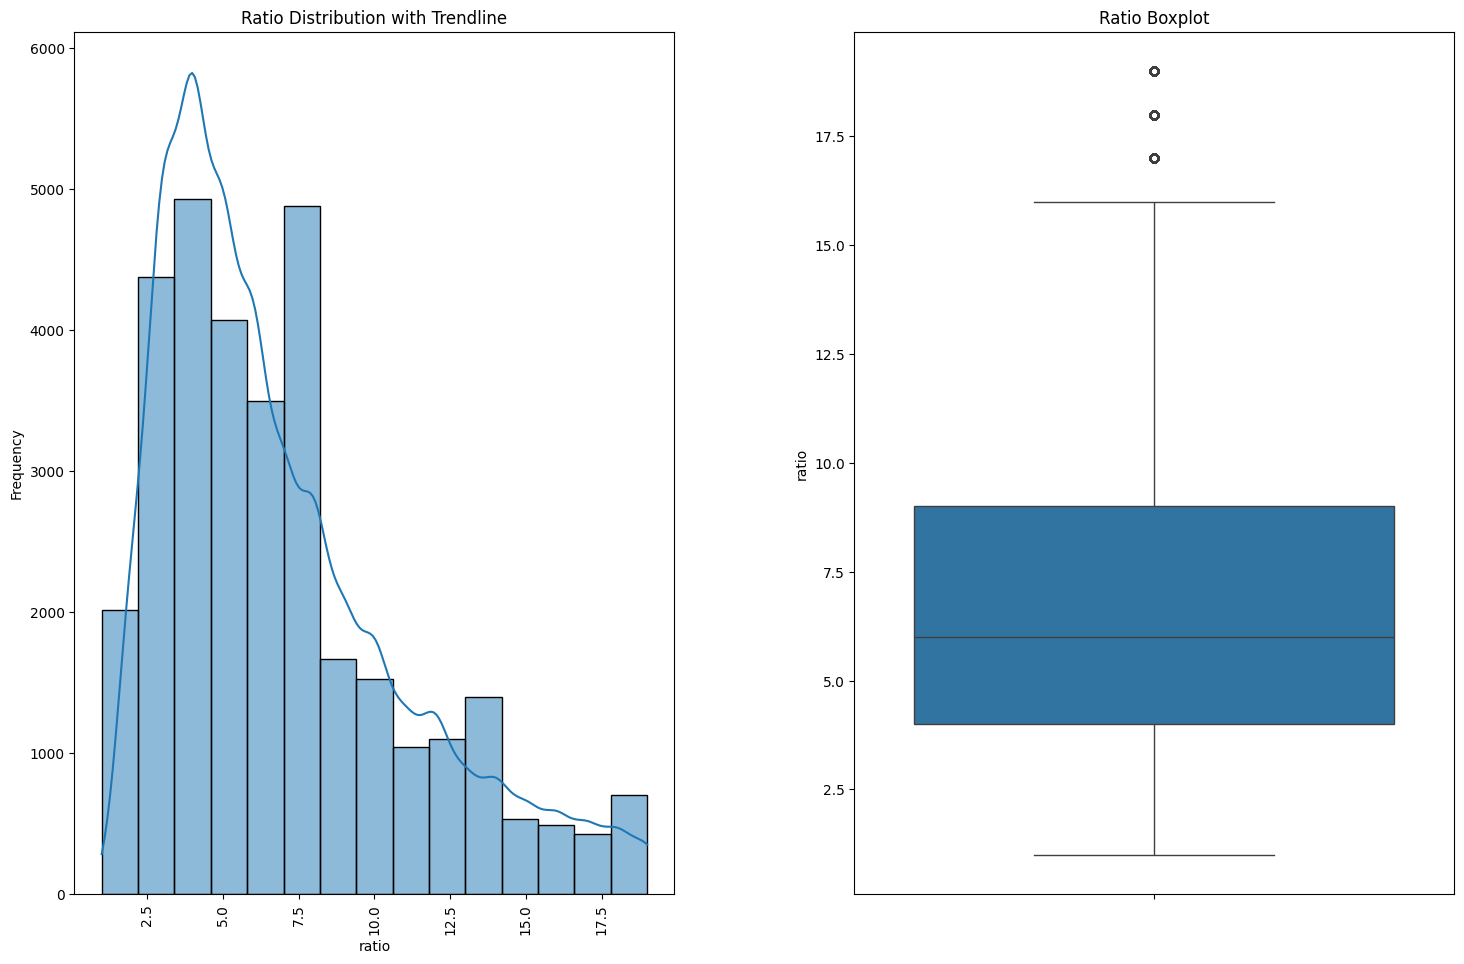

In [60]:
## Derived variable :ratio of annual_inc to loan_amnt
loan_df3['ratio'] = round(loan_df3['annual_inc'] / loan_df3['loan_amnt'])
## remove outliers
ratio_filtered = removeOutliers(loan_df3,'ratio')


# univariateBarGraph
frequencyAndBoxplot(ratio_filtered, 'ratio', bins=15)

**most of borrower has atio of annual_inc to loan_amnt between range 2.5 to 7.5**

## 4. Bivariate Analysis

In [35]:
def Bivariate_Barplot(*, data=loan_df3, x, y, title=None, figsize=(10,5)):
    """
        Parameters:
            data : defaulted at the 'loan_df3' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a bar plot
    """
    fig, ax = pt.subplots(figsize=figsize)
    sns.barplot(data=data, x=x, y=y,hue='loan_status')
    
    if title is not None:
        pt.title(title)
    pt.show()

In [58]:
def Bivariate_Categorical(*, data=loan_df3, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan_df3' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = pt.subplots(figsize=figsize)
    pvt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pvt, ax=ax, cmap='coolwarm')
    if title is not None:
        pt.title(title)
    pt.show()

In [37]:
def PercentileCut (*, data=loan_df3, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan_df3'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

### Analysing Annual income with other Categorical variables

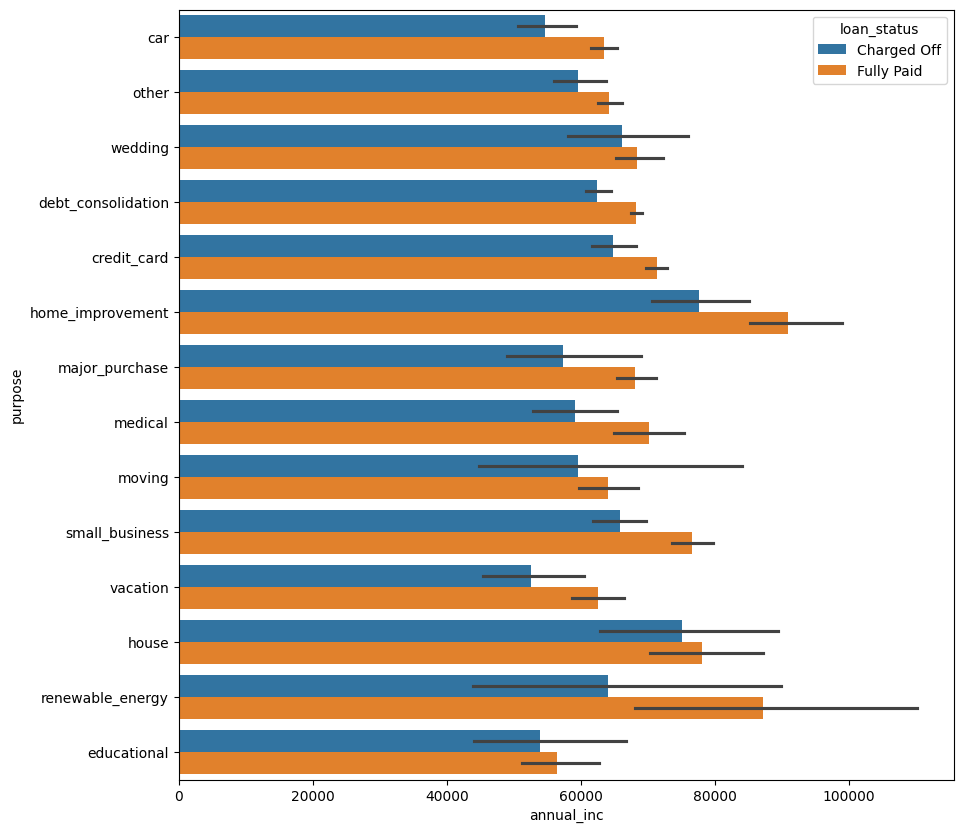

In [35]:
# Annual income vs loan purpose
Bivariate_Barplot(x='annual_inc', y='purpose', figsize=(10,10))

**Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.
Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"**

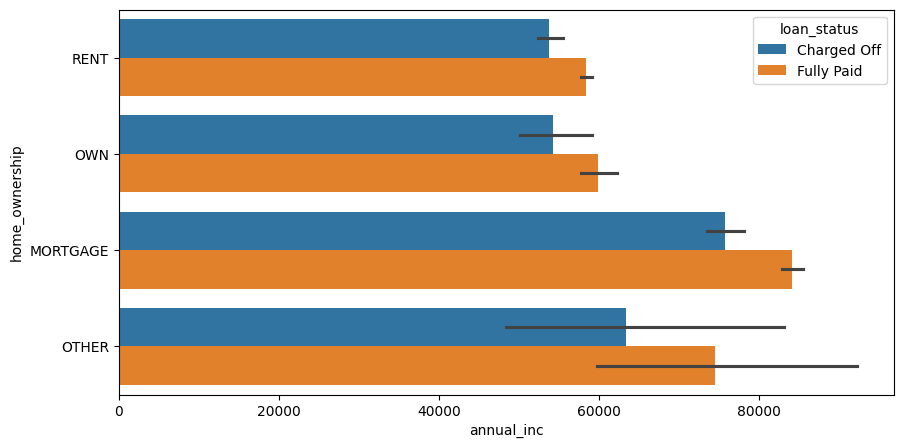

In [37]:
# Annual income vs home ownership
Bivariate_Barplot(x='annual_inc', y='home_ownership', figsize=(10,5))

**Applicant having home ownership as MORTGAE and Annual income greater than 60K has higher chance of defaulting.**

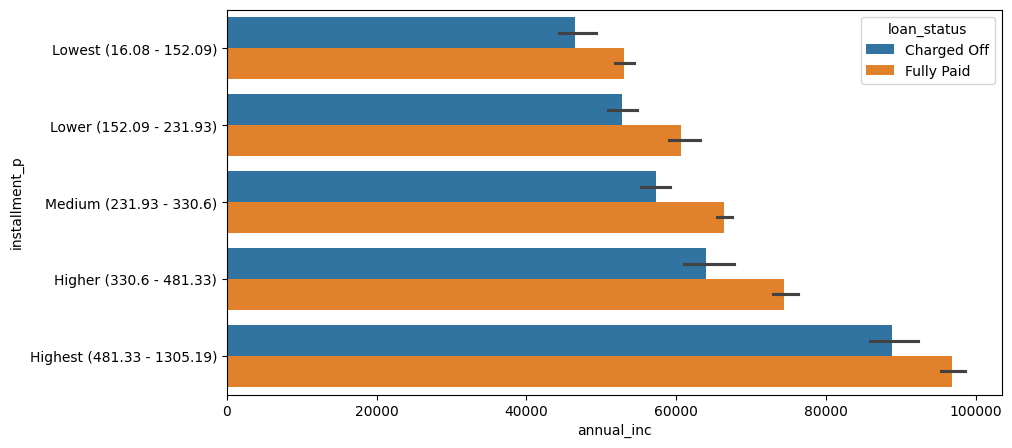

In [41]:
# Annual income vs installment
PercentileCut(column='installment')
Bivariate_Barplot(x='annual_inc', y='installment_p')

**Above figure shows that for higher installments for any income group have more number of defaults.**

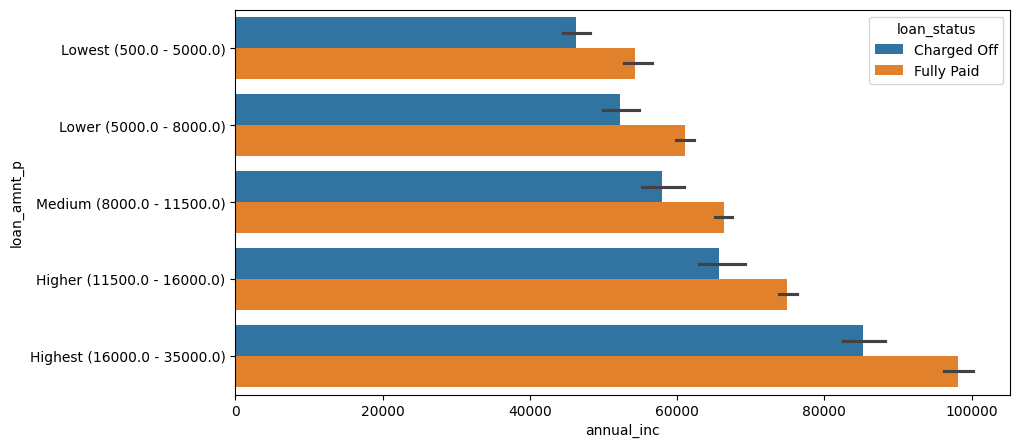

In [42]:
# Annual Income vs Loan amount
PercentileCut(column='loan_amnt')
Bivariate_Barplot(x='annual_inc', y='loan_amnt_p')

**Across all the income groups, the loan_amount is higher for people who defaulted.**

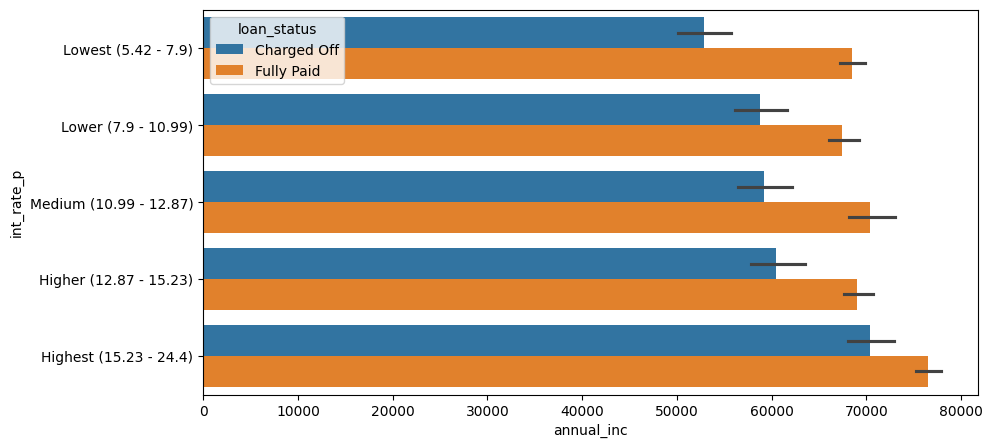

In [39]:
# Annual income vs int_rate
PercentileCut(column='int_rate')
Bivariate_Barplot(x='annual_inc', y='int_rate_p')

### Analysing loan_amount with other Categorical variables

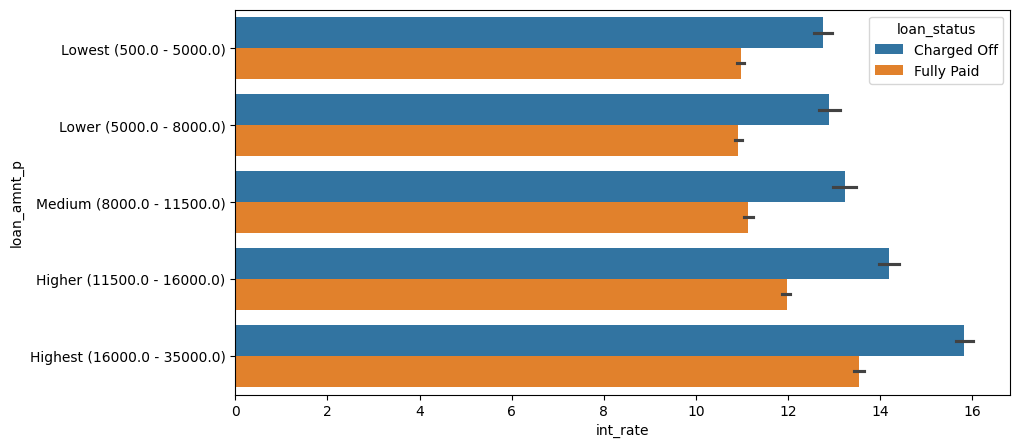

In [40]:
# Loan Amount vs Interest Rate
PercentileCut(column='loan_amnt')
Bivariate_Barplot(x='int_rate', y='loan_amnt_p')

**For higher loan amount if interest rate is high then then chances of default is high.**

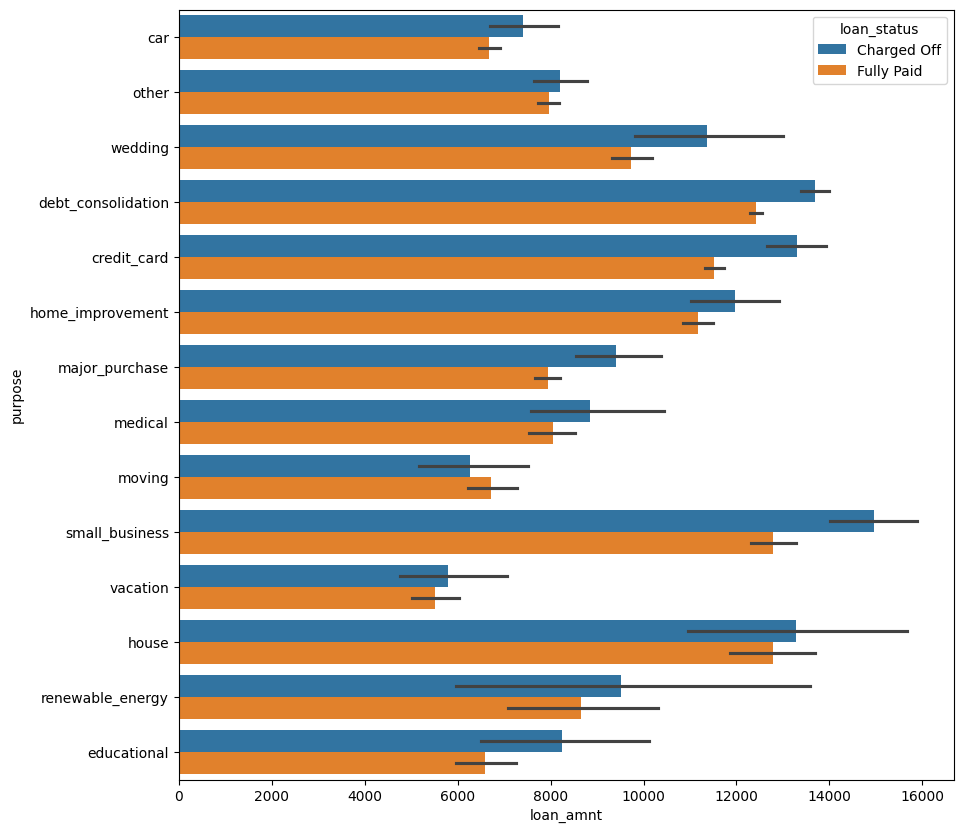

In [43]:
# Loan amount vs Loan purpose
Bivariate_Barplot(x='loan_amnt', y='purpose', figsize=(10,10))

**small_business Applicaiton has higher chances of default, when loan_amount is higher than 14K .**

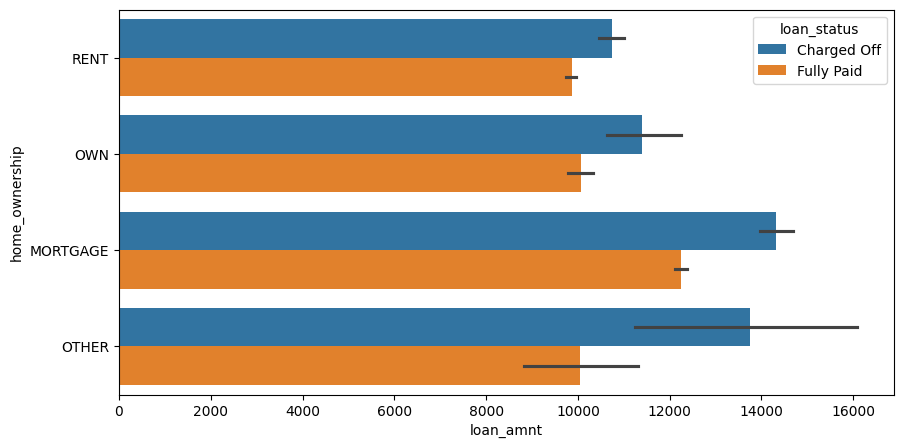

In [42]:
# Loan vs House Ownership
Bivariate_Barplot(x='loan_amnt', y='home_ownership')

**Applicant having home ownership as MORTGAE and loan_amount greater than 14K has higher chance of defaulting.**

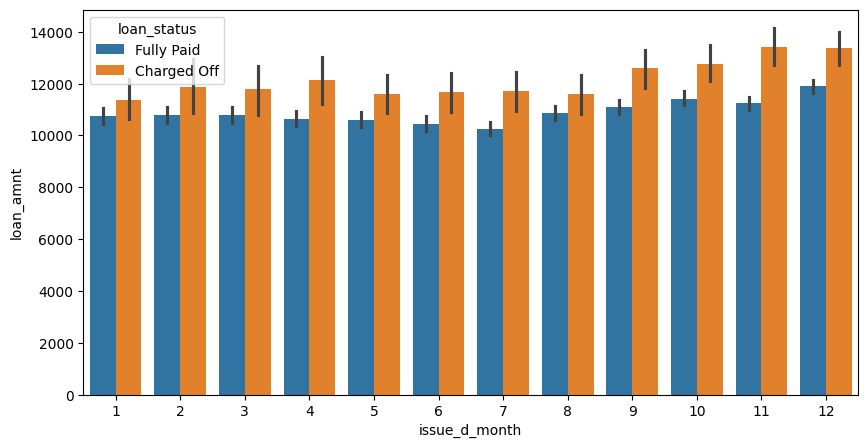

In [45]:
# Loan amount vs month issued
Bivariate_Barplot(x='issue_d_month', y='loan_amnt')

**December month has higest loan amount applications. Default chance is also higher in December.**

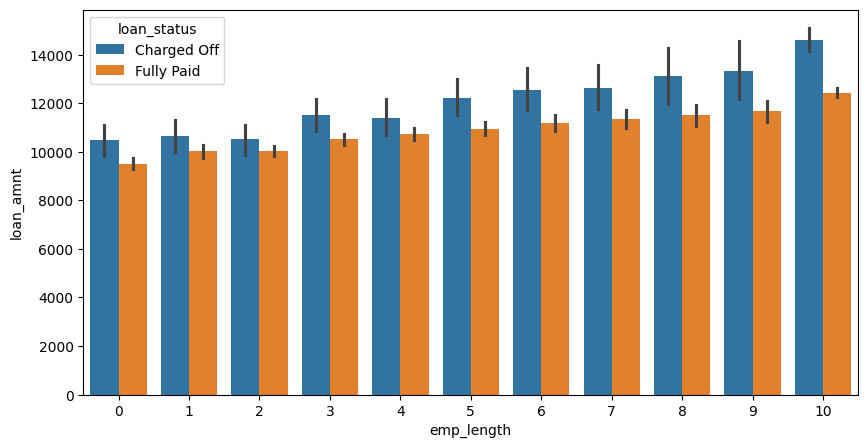

In [48]:
# Loan amount vs emp_length
Bivariate_Barplot(x='emp_length', y='loan_amnt')

**For Employment lenght 10 year, Defaults are higher when loan amount is greater than 10K**

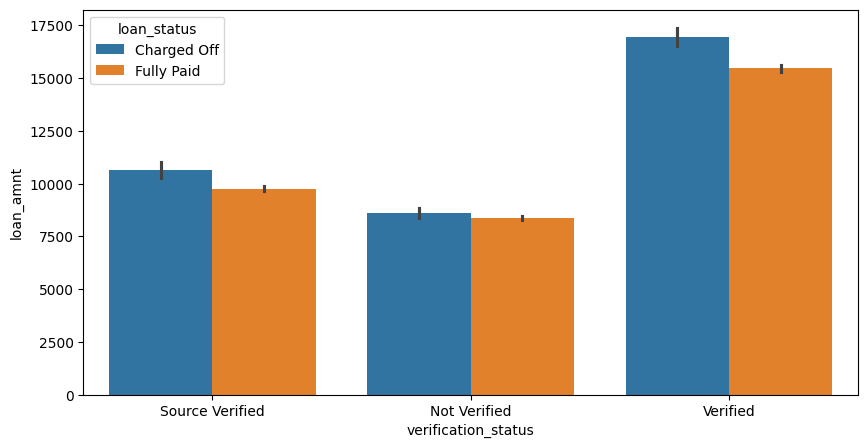

In [49]:
# Loan amount vs verification_status
Bivariate_Barplot(x='verification_status', y='loan_amnt')

**Verfied status has higher defeault chance when load amount is greate than 16K. This also indeicates issue in verification process.**

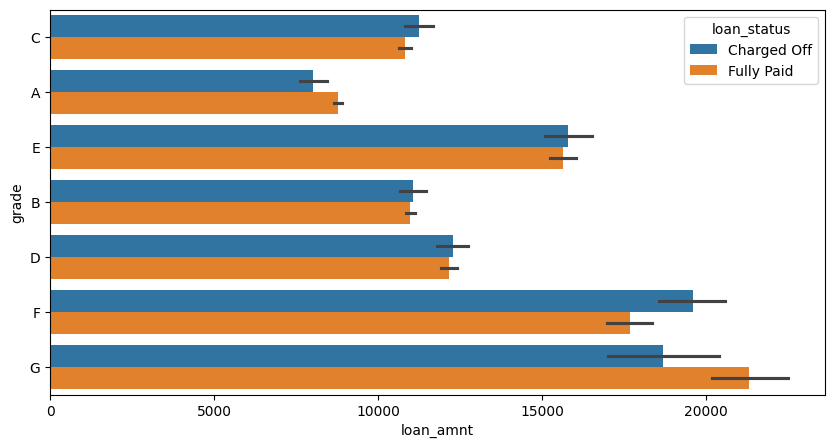

In [47]:
# Loan amount vs grade
Bivariate_Barplot(x='loan_amnt', y='grade')

**For F grade default is high, when Loan amount is between 15K-20K.**

### Bivariate Categorical Analysis

In [57]:
# Added additinal column for Loan status numberic value. Charged off=1 & Fully paid=0
loan_df3['loan_status_num'] = loan_df3['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

#### Address state vs purpose

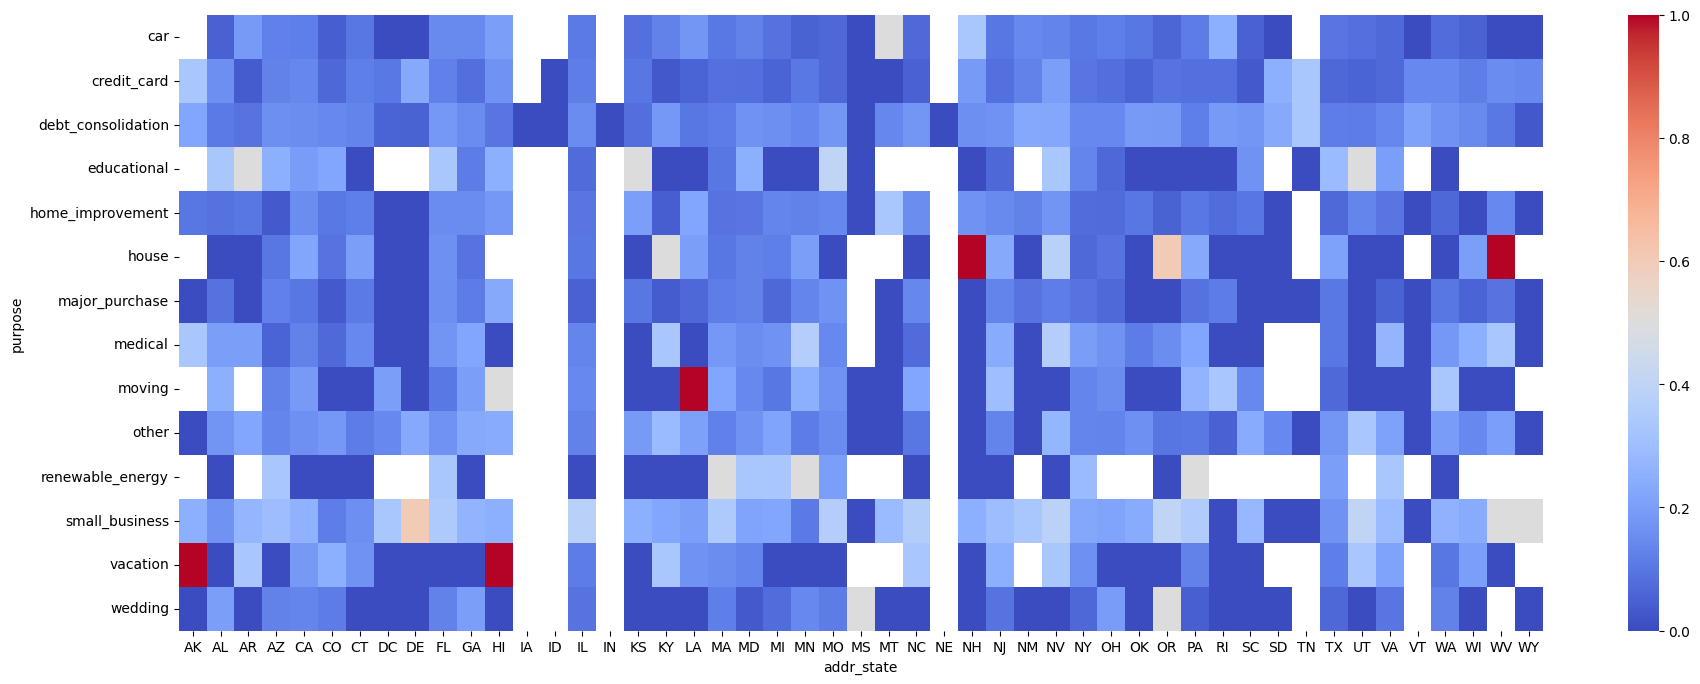

In [52]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

**As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. Some of the examples are below:
•vacation loans in AK, HI, OR
•House loans in NH, WV
•small business loans in DE, NM, WV, wY**

#### Annual income group vs pupose

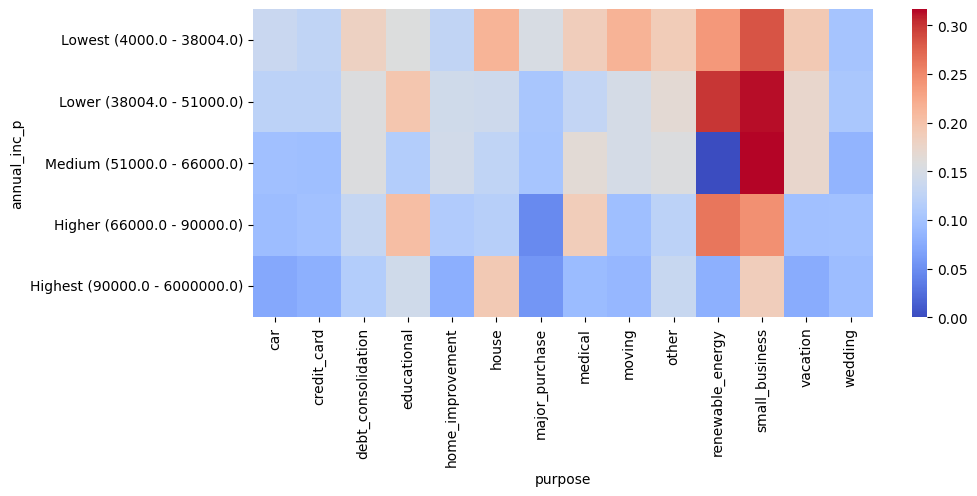

In [54]:
PercentileCut(column='annual_inc')
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

Above plot show the various income group and risker purpose of loan issued. <br> * small business loans for lowest and medium income groups <br> * renewable energy loans for higher income group

#### Annual income group vs dti group

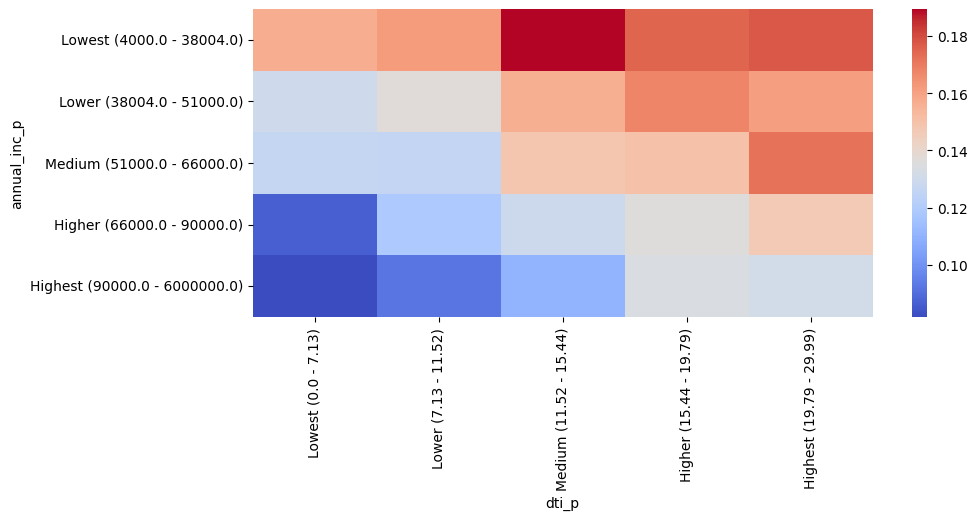

In [55]:
PercentileCut(column='dti')
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

**Medium debt-to-income group in the lowest income range is the most risky.**

### Insights from Bivariate Analysis
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
- Applicant having home ownership as **MORTGAE** and Annual income **greater than 60K** or loan amount **greater than 14K** has higher chance of defaulting.
- higher installments(>500) for any income group have more number of defaults.
- loan_amount is higher for people who defaulted across all the income groups.
- higher loan amount haivng higher **interest rate(>12%)** has higher chance of defaulting.
- **small_business** loan where loan_amount is higher than 14K has higher chances of default,.
- Applicant having employment lenght **10 years** and loan amount is **greater than 10K** has higher chance of defaulting.
- Verfied status having loan amount **greater than 16K** has higher chance of defaulting. This also indicates issue in verification process.
- **F grade** loan haivng Loan amount between **15K-20K** has higher chance of defaulting.
- vacation loans in AK, HI, OR is risky. House loans in NH, WV is risky. small business loans in DE, NM, WV, wY is risky.
- **small business** loans for lowest and medium income groups (4K-65K) has higher chance of defaulting.
- Medium debt-to-income group in the lowest income range is the most risky.